In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the Road Safety Open Dataset Data Guide

Guide = pd.read_excel('Road-Safety-Open-Dataset-Data-Guide.xlsx')

# import data 2016-2020

accidents_last5 = pd.read_csv("dft-road-casualty-statistics-accident-last-5-years.csv")
casualty_last5 = pd.read_csv("dft-road-casualty-statistics-casualty-last-5-years.csv")
vehicle_last5 = pd.read_csv("dft-road-casualty-statistics-vehicle-last-5-years.csv")

# import data 2021

accident21 = pd.read_csv("dft-road-casualty-statistics-accident-provisional-mid-year-unvalidated-2021.csv")
casualty21 = pd.read_csv("dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2021.csv")
vehicle21 = pd.read_csv("dft-road-casualty-statistics-vehicle-provisional-mid-year-unvalidated-2021.csv")


In [3]:
len(accidents_last5)

597973

In [4]:
len(accident21)

42358

In [5]:
# merging the data

accidents_last55 = pd.concat([accidents_last5,accident21])
casualty_last55 = pd.concat([casualty_last5,casualty21])
vehicle_last55 = pd.concat([vehicle_last5,vehicle21])

In [6]:
# number of accidents per month

accidents_last55["Month"] = [x[-7::] for x in accidents_last55.date]
accidents_count = pd.DataFrame(accidents_last55["Month"].value_counts())
accidents_count.index = pd.to_datetime(accidents_count.index)
accidents_count = accidents_count.sort_index()
accidents_count

,Month
2016-01-01,11688
2016-02-01,10657
2016-03-01,10836
2016-04-01,10592
2016-05-01,11482
...,...
2021-02-01,5158
2021-03-01,6691
2021-04-01,8079
2021-05-01,8609


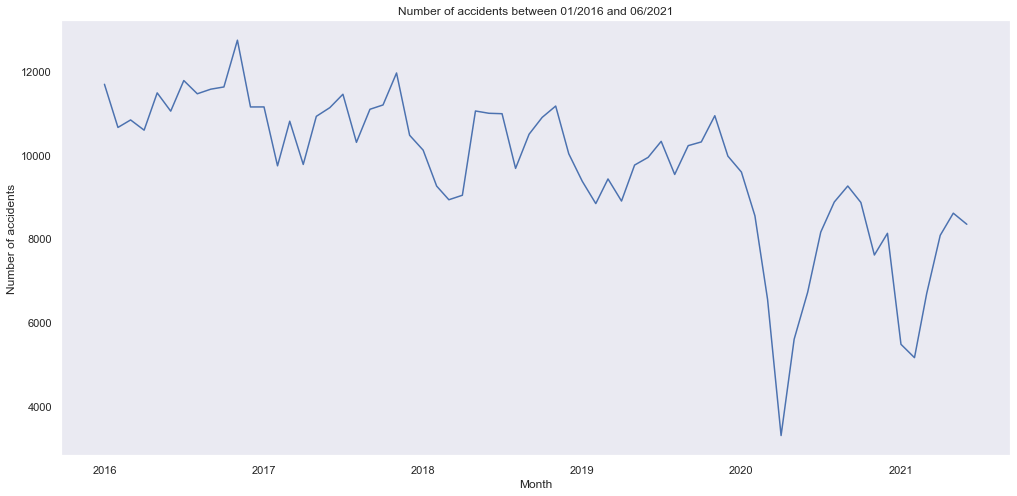

In [7]:
# Plot number of accidents per month

plt.figure(figsize=(17, 8))
plt.plot(accidents_count)
plt.title('Number of accidents between 01/2016 and 06/2021')
plt.ylabel('Number of accidents')
plt.xlabel('Month')
plt.grid(False)
plt.show()

In [8]:
accidents_count[0:-18].describe()

,Month
count,48.000000
mean,10557.791667
std,897.999288
min,8838.000000
25%,9899.750000
50%,10731.500000
75%,11146.250000
max,12741.000000


In [9]:
accidents_count[-18::].describe()

,Month
count,18.000000
mean,7419.833333
std,1685.940870
min,3298.000000
25%,6586.000000
50%,8103.500000
75%,8593.250000
max,9591.000000


In [10]:
accidents_last5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597973 entries, 0 to 597972
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               597973 non-null  object 
 1   accident_year                                597973 non-null  int64  
 2   accident_reference                           597973 non-null  object 
 3   location_easting_osgr                        597850 non-null  float64
 4   location_northing_osgr                       597850 non-null  float64
 5   longitude                                    597840 non-null  float64
 6   latitude                                     597840 non-null  float64
 7   police_force                                 597973 non-null  int64  
 8   accident_severity                            597973 non-null  int64  
 9   number_of_vehicles                           597973 non-nul

In [11]:
# checking for duplicates

print("The number of duplicates on accidents data is:",accidents_last55.duplicated().sum())
print("The number of duplicates on casualty data is:",casualty_last55.duplicated().sum())
print("The number of duplicates on vehicle data is:",vehicle_last55.duplicated().sum())

The number of duplicates on accidents data is: 0
The number of duplicates on casualty data is: 0
The number of duplicates on vehicle data is: 0


# Accidents data analysis

In [12]:
accidents_last55.isnull().sum()

accident_index                                      0
accident_year                                       0
accident_reference                                  0
location_easting_osgr                             692
location_northing_osgr                            692
longitude                                       42491
latitude                                        42491
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number           

In [13]:
accidents_last55.isin([-1]).sum()

accident_index                                      0
accident_year                                       0
accident_reference                                  0
location_easting_osgr                               0
location_northing_osgr                              0
longitude                                           0
latitude                                            0
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                        43147
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number           

In [14]:
accidents_last55 = accidents_last55.drop(columns = ['location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'status'])
accidents_last55.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_year,640331.0,2018.037143,1.550375,2016.0,2017.0,2018.0,2019.0,2021.0
police_force,640331.0,28.382607,24.858599,1.0,5.0,23.0,45.0,99.0
accident_severity,640331.0,2.790549,0.438775,1.0,3.0,3.0,3.0,3.0
number_of_vehicles,640331.0,1.842800,0.707969,1.0,1.0,2.0,2.0,24.0
number_of_casualties,640331.0,1.303841,0.749346,1.0,1.0,1.0,1.0,59.0
day_of_week,640331.0,4.112047,1.926305,1.0,2.0,4.0,6.0,7.0
local_authority_district,640331.0,306.923853,261.736036,-1.0,31.0,293.0,500.0,941.0
first_road_class,640331.0,4.199608,1.463972,1.0,3.0,4.0,6.0,6.0
first_road_number,640331.0,777.459223,1579.711170,0.0,0.0,30.0,523.0,9302.0
road_type,640331.0,5.201625,1.690715,-1.0,6.0,6.0,6.0,9.0


In [15]:
accidents_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640331 entries, 0 to 42357
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               640331 non-null  object 
 1   accident_year                                640331 non-null  int64  
 2   accident_reference                           640331 non-null  object 
 3   police_force                                 640331 non-null  int64  
 4   accident_severity                            640331 non-null  int64  
 5   number_of_vehicles                           640331 non-null  int64  
 6   number_of_casualties                         640331 non-null  int64  
 7   date                                         640331 non-null  object 
 8   day_of_week                                  640331 non-null  int64  
 9   time                                         640331 non-null

In [16]:
# Number of accidents per year

accidents_last55.accident_year.value_counts()

2016    136621
2017    129982
2018    122635
2019    117536
2020     91199
2021     42358
Name: accident_year, dtype: int64

In [17]:
# recoding accident severity

accidents_last55['accident_severity'] = accidents_last55['accident_severity'].astype('category')
accidents_last55['accident_severity'] = accidents_last55['accident_severity'].cat.rename_categories({1: 'Fatal', 2: 'Serious', 3: 'Slight'})

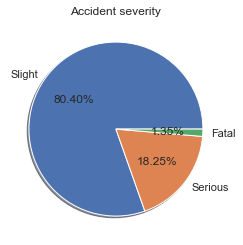

In [18]:
plt.pie(accidents_last55['accident_severity'].value_counts(), labels=list(accidents_last55['accident_severity'].value_counts().index), shadow = True, autopct='%1.2f%%')
plt.title("Accident severity");

In [19]:
# number_of_vehicles

number_of_vehicles_count = pd.DataFrame(accidents_last55.number_of_vehicles.value_counts())
number_of_vehicles_count = number_of_vehicles_count.sort_index()
number_of_vehicles_count['percentage'] = (number_of_vehicles_count['number_of_vehicles']/number_of_vehicles_count['number_of_vehicles'].sum())*100
number_of_vehicles_count

,number_of_vehicles,percentage
1,185794,29.015306
2,390746,61.022502
3,48892,7.635426
4,10946,1.709428
5,2590,0.404478
6,788,0.123061
7,333,0.052004
8,121,0.018896
9,56,0.008745
10,30,0.004685


In [20]:
# number_of_casualties

number_of_casualties_count = pd.DataFrame(accidents_last55.number_of_casualties.value_counts())
number_of_casualties_count = number_of_casualties_count.sort_index()
number_of_casualties_count['percentage'] = (number_of_casualties_count['number_of_casualties']/number_of_casualties_count['number_of_casualties'].sum())*100
number_of_casualties_count

,number_of_casualties,percentage
1,508858,79.467963
2,91689,14.319001
3,25722,4.016985
4,8967,1.400369
5,3160,0.493495
6,1150,0.179595
7,389,0.060750
8,163,0.025456
9,75,0.011713
10,61,0.009526


In [21]:
# change type of date column
accidents_last55.date = pd.to_datetime(accidents_last55.date)

In [22]:
# recoding day_of_week

accidents_last55['day_of_week'] = accidents_last55['day_of_week'].astype('category')
accidents_last55['day_of_week'] = accidents_last55['day_of_week'].cat.rename_categories({1:'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'})

In [23]:
# day_of_week

day_of_week_count = pd.DataFrame(accidents_last55.day_of_week.value_counts())
day_of_week_count = day_of_week_count.sort_index()
day_of_week_count

,day_of_week
Sunday,71832
Monday,90256
Tuesday,94587
Wednesday,96163
Thursday,97615
Friday,104907
Saturday,84971


In [24]:
day_of_week_count2 = accidents_last55.groupby(["day_of_week","date"]).size()

In [25]:
# mean and std of number of accidents per day of week

mean_for_day_of_week = pd.DataFrame(day_of_week_count2.mean(level=0))
mean_for_day_of_week['standard deviation'] = day_of_week_count2.std(level=0)
mean_for_day_of_week.columns=['Mean','Standard deviation']
mean_for_day_of_week

,Mean,Standard deviation
day_of_week,,
Sunday,35.772908,90.363382
Monday,44.948207,113.733775
Tuesday,47.105080,119.048166
Wednesday,47.889940,121.043435
Thursday,48.613048,122.771464
Friday,52.244522,131.953493
Saturday,42.316235,106.326542


In [26]:
accidents_last55['hour'] = pd.to_datetime(accidents_last55.time).dt.hour
hour_count = pd.DataFrame(accidents_last55.hour.value_counts())
hour_count = hour_count.sort_index()


<Figure size 864x432 with 0 Axes>

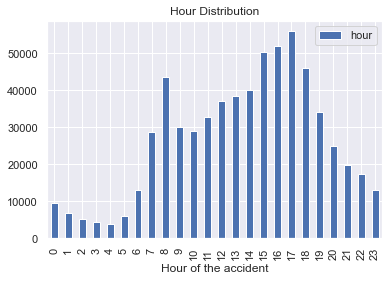

In [27]:
plt.figure(figsize=(12, 6))
hour_count.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution")
plt.show()

In [28]:
sub_monday = accidents_last55[accidents_last55['day_of_week'] == 'Monday']
sub_monday.hour = pd.to_datetime(sub_monday.time).dt.hour


In [29]:
hour_count_monday = pd.DataFrame(sub_monday.hour.value_counts())
hour_count_monday = hour_count.sort_index()

<Figure size 864x432 with 0 Axes>

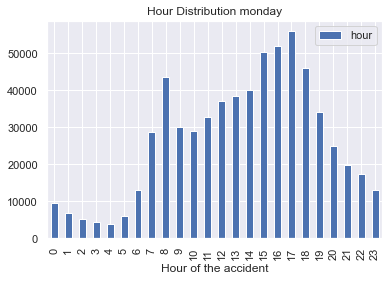

In [30]:
plt.figure(figsize=(12, 6))
hour_count_monday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution monday")
plt.show()

In [31]:
sub_Tuesday = accidents_last55[accidents_last55['day_of_week'] == 'Tuesday']
sub_Tuesday.hour = pd.to_datetime(sub_Tuesday.time).dt.hour
hour_count_Tuesday = pd.DataFrame(sub_Tuesday.hour.value_counts())
hour_count_Tuesday = hour_count_Tuesday.sort_index()

<Figure size 864x432 with 0 Axes>

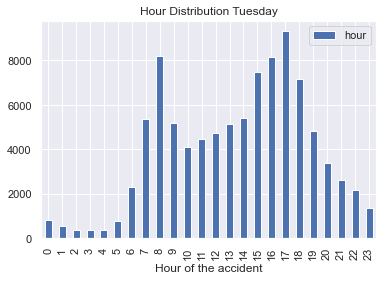

In [32]:
plt.figure(figsize=(12, 6))
hour_count_Tuesday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Tuesday")
plt.show()

In [33]:
sub_Wednesday = accidents_last55[accidents_last55['day_of_week'] == 'Wednesday']
sub_Wednesday.hour = pd.to_datetime(sub_Wednesday.time).dt.hour
hour_count_Wednesday = pd.DataFrame(sub_Wednesday.hour.value_counts())
hour_count_Wednesday = hour_count_Wednesday.sort_index()

<Figure size 864x432 with 0 Axes>

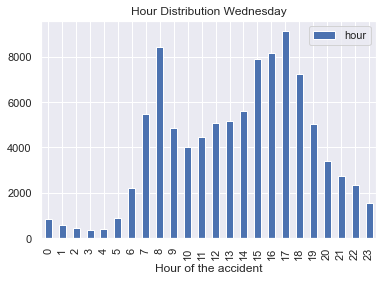

In [34]:
plt.figure(figsize=(12, 6))
hour_count_Wednesday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Wednesday")
plt.show()

In [35]:
sub_Thursday = accidents_last55[accidents_last55['day_of_week'] == 'Thursday']
sub_Thursday.hour = pd.to_datetime(sub_Thursday.time).dt.hour
hour_count_Thursday = pd.DataFrame(sub_Thursday.hour.value_counts())
hour_count_Thursday = hour_count_Thursday.sort_index()

<Figure size 864x432 with 0 Axes>

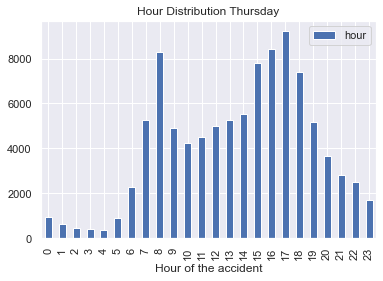

In [36]:
plt.figure(figsize=(12, 6))
hour_count_Thursday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Thursday")
plt.show()

In [37]:
sub_Friday = accidents_last55[accidents_last55['day_of_week'] == 'Friday']
sub_Friday.hour = pd.to_datetime(sub_Friday.time).dt.hour
hour_count_Friday = pd.DataFrame(sub_Friday.hour.value_counts())
hour_count_Friday = hour_count_Friday.sort_index()

<Figure size 864x432 with 0 Axes>

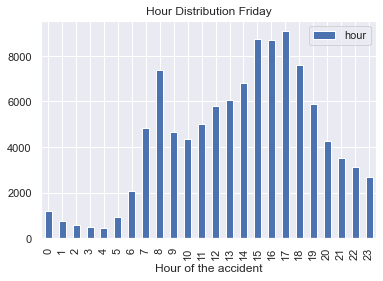

In [38]:
plt.figure(figsize=(12, 6))
hour_count_Friday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Friday")
plt.show()

In [39]:
sub_Saturday = accidents_last55[accidents_last55['day_of_week'] == 'Saturday']
sub_Saturday.hour = pd.to_datetime(sub_Saturday.time).dt.hour
hour_count_Saturday = pd.DataFrame(sub_Saturday.hour.value_counts())
hour_count_Saturday = hour_count_Saturday.sort_index()

<Figure size 864x432 with 0 Axes>

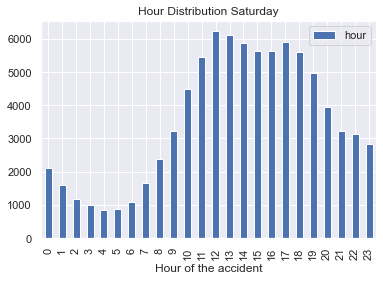

In [40]:
plt.figure(figsize=(12, 6))
hour_count_Saturday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Saturday")
plt.show()

In [41]:
sub_Sunday = accidents_last55[accidents_last55['day_of_week'] == 'Sunday']
sub_Sunday.hour = pd.to_datetime(sub_Sunday.time).dt.hour
hour_count_Sunday = pd.DataFrame(sub_Sunday.hour.value_counts())
hour_count_Sunday = hour_count_Sunday.sort_index()

<Figure size 864x432 with 0 Axes>

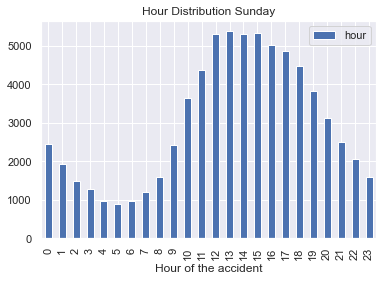

In [42]:
plt.figure(figsize=(12, 6))
hour_count_Sunday.plot(kind='bar')
plt.xlabel('Hour of the accident')
plt.title("Hour Distribution Sunday")
plt.show()

In [43]:
# Month

accidents_last55["Month_no"] = accidents_last55['Month'].str[:2]
Month_no_count = accidents_last55.Month_no.value_counts().sort_index()


In [44]:
Month_no_count

01    57389
02    52195
03    53241
04    49678
05    57420
06    58178
07    52694
08    49850
09    52637
10    52891
11    54414
12    49744
Name: Month_no, dtype: int64

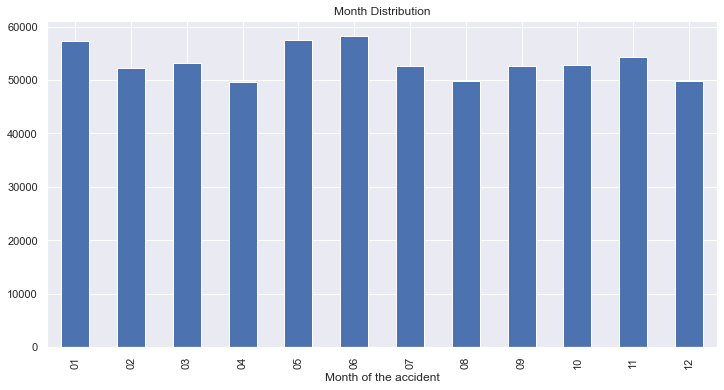

In [45]:
plt.figure(figsize=(12, 6))
Month_no_count.plot(kind='bar')
plt.xlabel('Month of the accident')
plt.title("Month Distribution")
plt.show()

In [46]:
# first_road_class

accidents_last55.first_road_class.value_counts()

3    283059
6    220248
4     77110
5     37100
1     21094
2      1720
Name: first_road_class, dtype: int64

In [47]:
# road_type

accidents_last55.road_type.value_counts()

 6    466687
 3     98043
 1     39811
 2     15438
 9     11684
 7      8667
-1         1
Name: road_type, dtype: int64

In [48]:
accidents_last55['road_type'] = accidents_last55['road_type'].replace([-1],9)

In [49]:
accidents_last55.road_type.value_counts()

6    466687
3     98043
1     39811
2     15438
9     11685
7      8667
Name: road_type, dtype: int64

In [50]:
# recoding road_type

accidents_last55['road_type'] = accidents_last55['road_type'].astype('category')
accidents_last55['road_type'] = accidents_last55['road_type'].cat.rename_categories({1: 'Roundabout', 2: 'One way street', 3: 'Dual carriageway', 6: 'Single carriageway', 7: 'Slip road', 9: 'Unknown'})

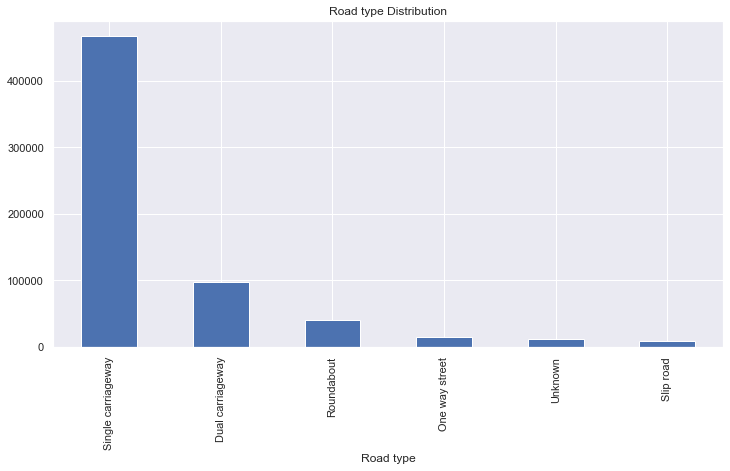

In [51]:
plt.figure(figsize=(12, 6))
accidents_last55.road_type.value_counts().plot(kind='bar')
plt.xlabel('Road type')
plt.title("Road type Distribution")
plt.show()

In [52]:
# speed_limit

accidents_last55['speed_limit'] = accidents_last55['speed_limit'].fillna(-1)

In [53]:
accidents_last55.speed_limit.value_counts()

 30.0    383309
 60.0     81027
 20.0     56291
 40.0     53824
 70.0     39396
 50.0     26275
-1.0        209
Name: speed_limit, dtype: int64

In [54]:
# recoding speed_limit

accidents_last55['speed_limit'] = accidents_last55['speed_limit'].astype('category')
accidents_last55['speed_limit'] = accidents_last55['speed_limit'].cat.rename_categories({-1: 'Unkown'})

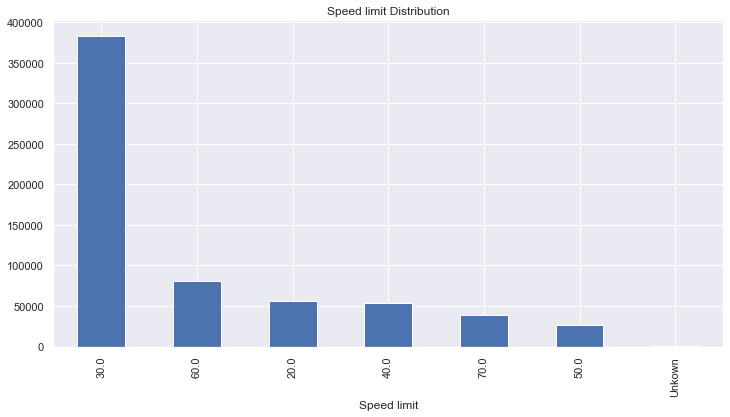

In [55]:
plt.figure(figsize=(12, 6))
accidents_last55.speed_limit.value_counts().plot(kind='bar')
plt.xlabel('Speed limit')
plt.title("Speed limit Distribution")
plt.show()

In [56]:
# junction_detail

accidents_last55.junction_detail.value_counts()

 0     266943
 3     188434
 6      60564
 1      52294
 9      26004
 8      15817
 5       9088
 2       8362
 7       7486
 99      5332
-1          7
Name: junction_detail, dtype: int64

In [57]:
accidents_last55['junction_detail'] = accidents_last55['junction_detail'].replace([-1],99)
accidents_last55.junction_detail.value_counts()

0     266943
3     188434
6      60564
1      52294
9      26004
8      15817
5       9088
2       8362
7       7486
99      5339
Name: junction_detail, dtype: int64

In [58]:
# recoding junction_detail

accidents_last55['junction_detail'] = accidents_last55['junction_detail'].astype('category')
accidents_last55['junction_detail'] = accidents_last55['junction_detail'].cat.rename_categories({0: 'Not at or within 20 metres of junction', 1: 'Roundabout', 2: 'Mini roundabout ', 3: 'T or staggered junction', 5: 'Slip road', 6: 'Crossroads', 7: 'Junction more than four arms', 8: 'Using private drive or entrance', 9: 'Other junction', 99: 'Unknown'})

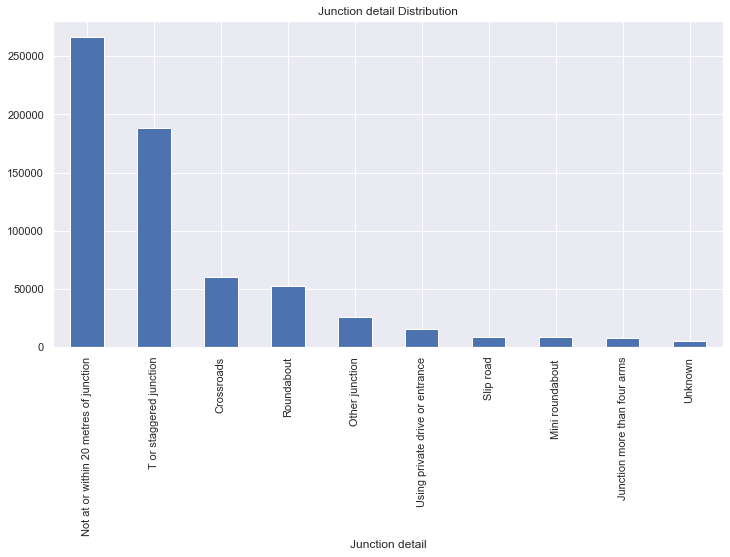

In [59]:
plt.figure(figsize=(12, 6))
accidents_last55.junction_detail.value_counts().plot(kind='bar')
plt.xlabel('Junction detail')
plt.title("Junction detail Distribution")
plt.show()

In [60]:
# junction_control

accidents_last55.junction_control.value_counts()

 4    285485
-1    268585
 2     70217
 9      9642
 3      3888
 1      2122
 0       392
Name: junction_control, dtype: int64

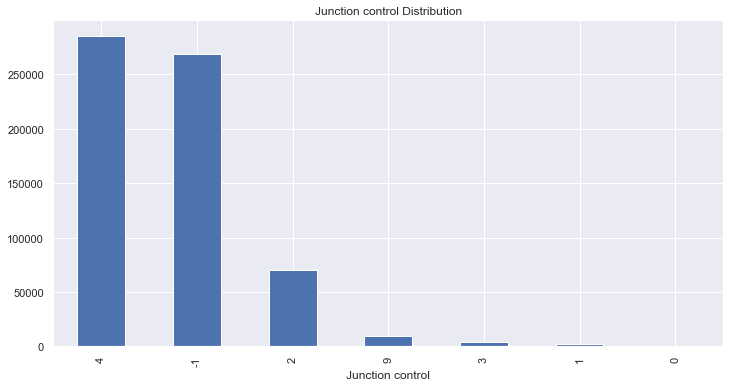

In [61]:
plt.figure(figsize=(12, 6))
accidents_last55.junction_control.value_counts().plot(kind='bar')
plt.xlabel('Junction control')
plt.title("Junction control Distribution")
plt.show()

In [62]:
# pedestrian_crossing_human_control

accidents_last55.pedestrian_crossing_human_control.value_counts()

 0    617534
 9     14008
 2      5728
 1      2227
-1       834
Name: pedestrian_crossing_human_control, dtype: int64

In [63]:
accidents_last55['pedestrian_crossing_human_control'] = accidents_last55['pedestrian_crossing_human_control'].replace([-1],9)
accidents_last55.pedestrian_crossing_human_control.value_counts()

0    617534
9     14842
2      5728
1      2227
Name: pedestrian_crossing_human_control, dtype: int64

In [64]:
# recoding junction_detail

accidents_last55['pedestrian_crossing_human_control'] = accidents_last55['pedestrian_crossing_human_control'].astype('category')
accidents_last55['pedestrian_crossing_human_control'] = accidents_last55['pedestrian_crossing_human_control'].cat.rename_categories({0: 'None within 50 metres', 1: 'Control by school crossing patrol', 2: 'Control by other authorised person', 9: 'Unknown'})

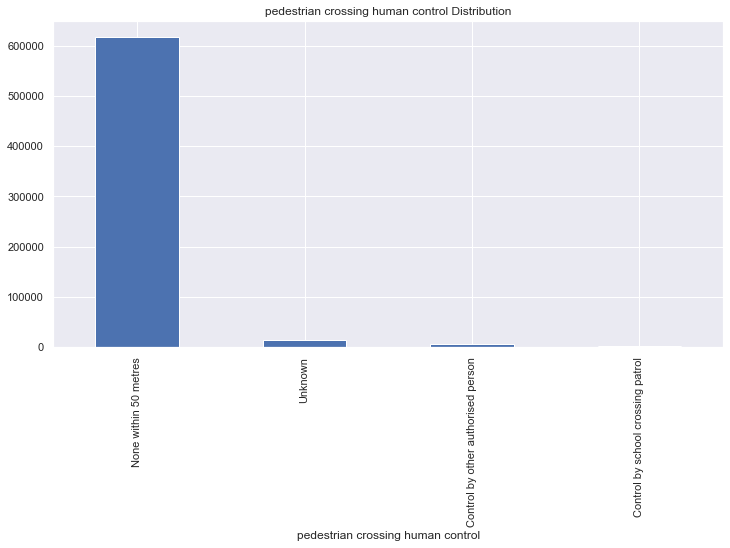

In [65]:
plt.figure(figsize=(12, 6))
accidents_last55.pedestrian_crossing_human_control.value_counts().plot(kind='bar')
plt.xlabel('pedestrian crossing human control')
plt.title("pedestrian crossing human control Distribution")
plt.show()

In [66]:
# pedestrian_crossing_physical_facilities

accidents_last55.pedestrian_crossing_physical_facilities.unique()

array([ 0,  8,  4,  5,  1,  9,  7, -1], dtype=int64)

In [67]:
accidents_last55.pedestrian_crossing_physical_facilities.value_counts()

 0    499075
 5     49700
 4     36422
 1     23636
 8     16012
 9     13343
 7      1359
-1       784
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [68]:
accidents_last55['pedestrian_crossing_physical_facilities'] = accidents_last55['pedestrian_crossing_physical_facilities'].replace([-1,9],7)
accidents_last55.pedestrian_crossing_physical_facilities.value_counts()

0    499075
5     49700
4     36422
1     23636
8     16012
7     15486
Name: pedestrian_crossing_physical_facilities, dtype: int64

In [69]:
# recoding pedestrian_crossing_physical_facilities

accidents_last55['pedestrian_crossing_physical_facilities'] = accidents_last55['pedestrian_crossing_physical_facilities'].astype('category')
accidents_last55['pedestrian_crossing_physical_facilities'] = accidents_last55['pedestrian_crossing_physical_facilities'].cat.rename_categories({0: 'No physical crossing facility within 50m', 1: 'Zebra crossing', 4: 'Pelican, puffin, toucan or similar', 5: 'Pedestrian phase at traffic signal junction', 7: 'Footbridge or subway', 8: 'Central refuge'})

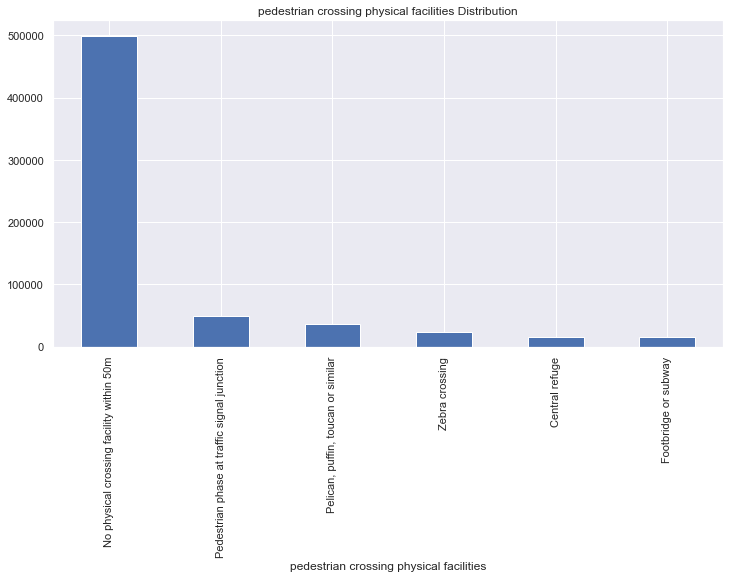

In [70]:
plt.figure(figsize=(12, 6))
accidents_last55.pedestrian_crossing_physical_facilities.value_counts().plot(kind='bar')
plt.xlabel('pedestrian crossing physical facilities')
plt.title("pedestrian crossing physical facilities Distribution")
plt.show()

In [71]:
# light_conditions

accidents_last55.light_conditions.value_counts()

 1    461181
 4    129064
 6     32407
 7     13199
 5      4464
-1        16
Name: light_conditions, dtype: int64

In [72]:
accidents_last55['light_conditions'] = accidents_last55['light_conditions'].replace([-1],7)
accidents_last55.light_conditions.value_counts()

1    461181
4    129064
6     32407
7     13215
5      4464
Name: light_conditions, dtype: int64

In [73]:
# recoding light_conditions

accidents_last55['light_conditions'] = accidents_last55['light_conditions'].astype('category')
accidents_last55['light_conditions'] = accidents_last55['light_conditions'].cat.rename_categories({1: 'Daylight', 4: 'Darkness: street lights present and lit', 5: 'Darkness: street lights present but unlit', 6: 'Darkness: no street lighting', 7: 'Darkness: street lighting unknown'})

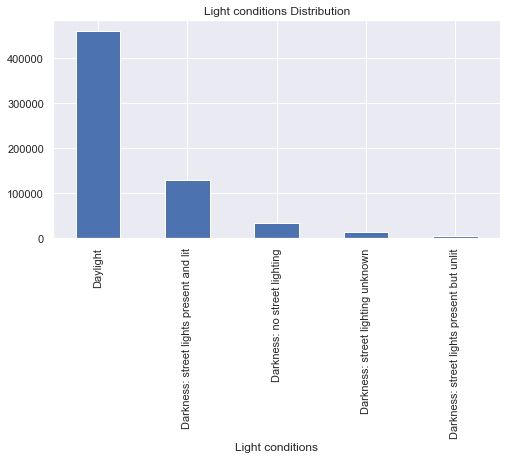

In [74]:
plt.figure(figsize=(8, 4))
accidents_last55.light_conditions.value_counts().plot(kind='bar')
plt.xlabel('Light conditions')
plt.title("Light conditions Distribution")
plt.show()

In [75]:
# weather_conditions

accidents_last55.weather_conditions.value_counts()

 1    513419
 2     72607
 9     18943
 8     14593
 5      7301
 4      6711
 3      3098
 7      2875
 6       750
-1        34
Name: weather_conditions, dtype: int64

In [76]:
accidents_last55['weather_conditions'] = accidents_last55['weather_conditions'].replace([-1,9],8)
accidents_last55.weather_conditions.value_counts()

1    513419
2     72607
8     33570
5      7301
4      6711
3      3098
7      2875
6       750
Name: weather_conditions, dtype: int64

In [77]:
# recoding weather_conditions

accidents_last55['weather_conditions'] = accidents_last55['weather_conditions'].astype('category')
accidents_last55['weather_conditions'] = accidents_last55['weather_conditions'].cat.rename_categories({1: 'Fine without high winds', 2: 'Raining without high winds', 3: 'Snowing without high winds', 4: 'Fine with high winds', 5: 'Raining with high winds', 6: 'Snowing with high winds', 7: 'Fog or mist', 8: 'Other'})

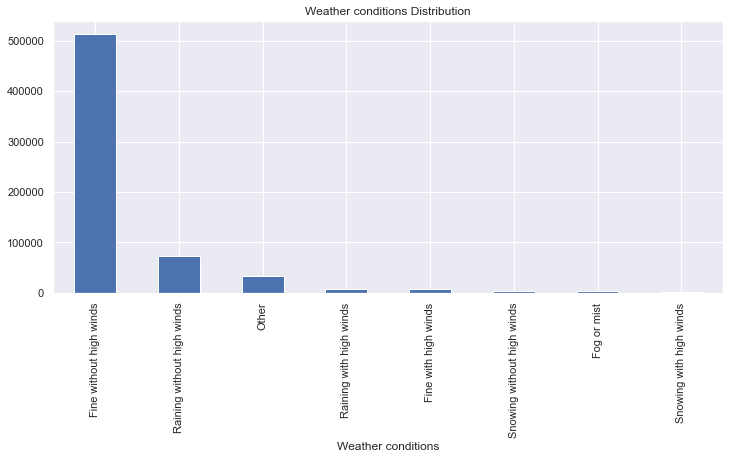

In [78]:
plt.figure(figsize=(12, 5))
accidents_last55.weather_conditions.value_counts().plot(kind='bar')
plt.xlabel('Weather conditions')
plt.title("Weather conditions Distribution")
plt.show()

In [79]:
# road_surface_conditions

accidents_last55.road_surface_conditions.value_counts()

 1    459085
 2    162223
 4      8603
 9      5101
 3      2577
-1      1924
 5       818
Name: road_surface_conditions, dtype: int64

In [80]:
accidents_last55['road_surface_conditions'] = accidents_last55['road_surface_conditions'].replace([-1],9)
accidents_last55.road_surface_conditions.value_counts()

1    459085
2    162223
4      8603
9      7025
3      2577
5       818
Name: road_surface_conditions, dtype: int64

In [81]:
# recoding road_surface_conditions

accidents_last55['road_surface_conditions'] = accidents_last55['road_surface_conditions'].astype('category')
accidents_last55['road_surface_conditions'] = accidents_last55['road_surface_conditions'].cat.rename_categories({1: 'Dry', 2: 'Wet / Damp', 3: 'Snow', 4: 'Frost / Ice', 5: 'Flood', 9: 'Unknown'})

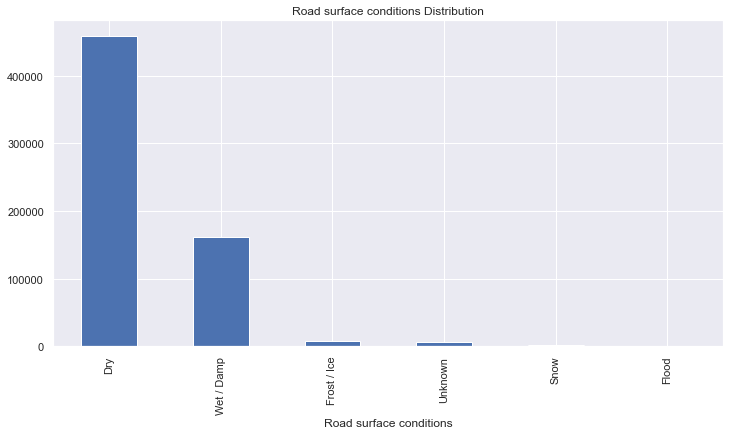

In [82]:
plt.figure(figsize=(12, 6))
accidents_last55.road_surface_conditions.value_counts().plot(kind='bar')
plt.xlabel('Road surface conditions')
plt.title("Road surface conditions Distribution")
plt.show()

In [83]:
# special_conditions_at_site

accidents_last55.special_conditions_at_site.value_counts()

 0    617607
 9      7801
 4      7269
 7      1652
 1      1467
 5      1383
 6      1129
 3       930
-1       839
 2       254
Name: special_conditions_at_site, dtype: int64

In [84]:
accidents_last55['special_conditions_at_site'] = accidents_last55['special_conditions_at_site'].replace([-1],9)
accidents_last55.special_conditions_at_site.value_counts()

0    617607
9      8640
4      7269
7      1652
1      1467
5      1383
6      1129
3       930
2       254
Name: special_conditions_at_site, dtype: int64

In [85]:
# recoding special_conditions_at_site

accidents_last55['special_conditions_at_site'] = accidents_last55['special_conditions_at_site'].astype('category')
accidents_last55['special_conditions_at_site'] = accidents_last55['special_conditions_at_site'].cat.rename_categories({0: 'None', 1: 'Auto traffic signal out', 2: 'Auto traffic signal partially defective', 3: 'Permanent road signing or marking defective or obsured', 4: 'Roadworks', 5: 'Road surface defective', 6: 'Oil or diesel', 7: 'Mud', 9: 'Unknown'})

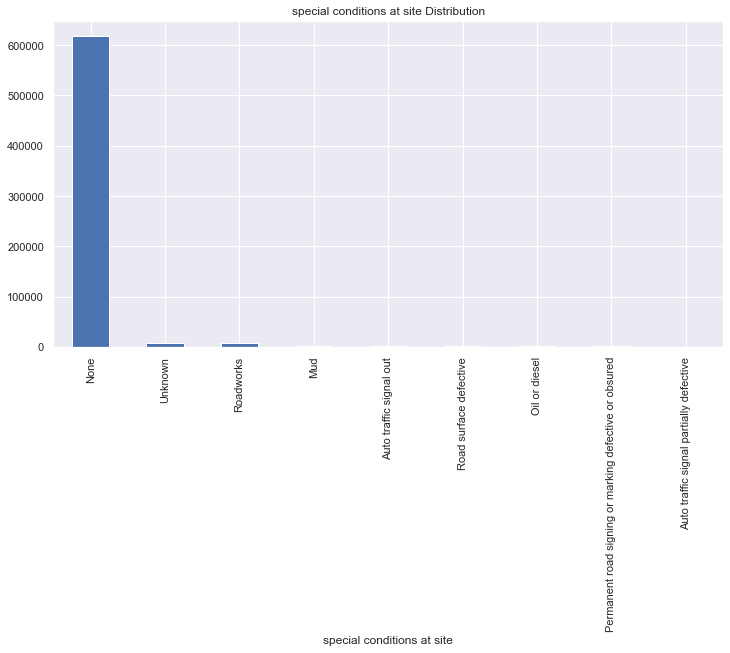

In [86]:
plt.figure(figsize=(12, 6))
accidents_last55.special_conditions_at_site.value_counts().plot(kind='bar')
plt.xlabel('special conditions at site')
plt.title("special conditions at site Distribution")
plt.show()

In [87]:
# carriageway_hazards

accidents_last55.carriageway_hazards.value_counts()

 0    621035
 9      6818
 2      5872
 7      2203
 1      1313
 6      1203
 3      1017
-1       870
Name: carriageway_hazards, dtype: int64

In [88]:
accidents_last55['carriageway_hazards'] = accidents_last55['carriageway_hazards'].replace([-1],9)
accidents_last55.carriageway_hazards.value_counts()

0    621035
9      7688
2      5872
7      2203
1      1313
6      1203
3      1017
Name: carriageway_hazards, dtype: int64

In [89]:
# recoding carriageway_hazards

accidents_last55['carriageway_hazards'] = accidents_last55['carriageway_hazards'].astype('category')
accidents_last55['carriageway_hazards'] = accidents_last55['carriageway_hazards'].cat.rename_categories({0: 'None', 1: 'Dislodged vehicle load in carriageway', 2: 'Other object in carriageway', 3: 'Involvement with previous accident', 6: 'Pedestrian in carriageway - not injured', 7: 'Any animal in carriageway (except ridden horse)', 9: 'Unknown'})

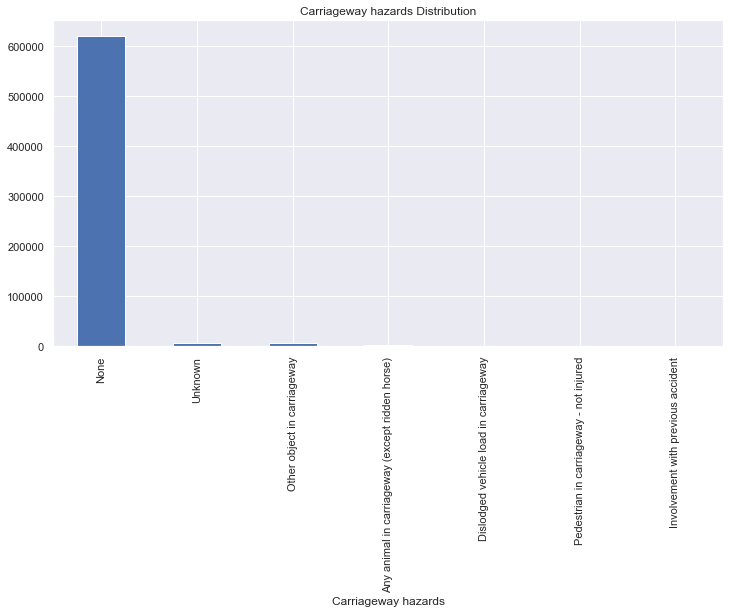

In [90]:
plt.figure(figsize=(12, 6))
accidents_last55.carriageway_hazards.value_counts().plot(kind='bar')
plt.xlabel('Carriageway hazards')
plt.title("Carriageway hazards Distribution")
plt.show()

In [91]:
# urban_or_rural_area

accidents_last55.urban_or_rural_area.value_counts()

 1    399771
 2    198087
-1     42359
 3       114
Name: urban_or_rural_area, dtype: int64

In [92]:
# recoding carriageway_hazards
accidents_last55['urban_or_rural_area'] = accidents_last55['urban_or_rural_area'].replace([-1],3)

accidents_last55['urban_or_rural_area'] = accidents_last55['urban_or_rural_area'].astype('category')
accidents_last55['urban_or_rural_area'] = accidents_last55['urban_or_rural_area'].cat.rename_categories({1: 'Urban', 2: 'Rural', 3: 'Unallocated'})

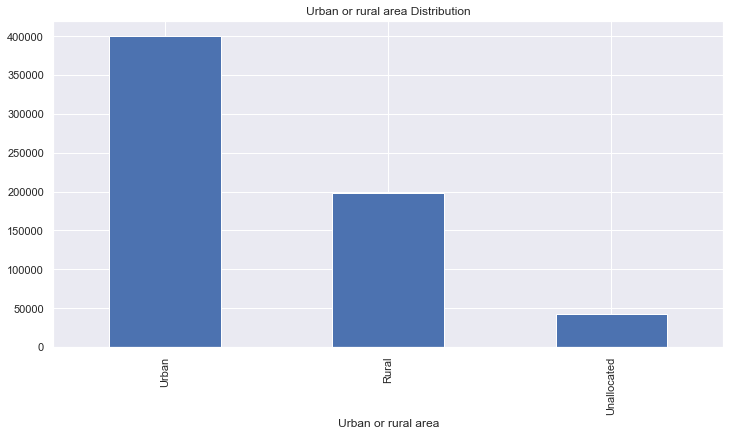

In [93]:
plt.figure(figsize=(12, 6))
accidents_last55.urban_or_rural_area.value_counts().plot(kind='bar')
plt.xlabel('Urban or rural area')
plt.title("Urban or rural area Distribution")
plt.show()

In [94]:
# did_police_officer_attend_scene_of_accident

accidents_last55.did_police_officer_attend_scene_of_accident.value_counts()

 1    459589
 2    153070
 3     27664
-1         8
Name: did_police_officer_attend_scene_of_accident, dtype: int64

In [95]:
# recoding carriageway_hazards

accidents_last55['did_police_officer_attend_scene_of_accident'] = accidents_last55['did_police_officer_attend_scene_of_accident'].astype('category')
accidents_last55['did_police_officer_attend_scene_of_accident'] = accidents_last55['did_police_officer_attend_scene_of_accident'].cat.rename_categories({1: 'Yes', 2: 'No', 3: 'No - self rep only', -1: 'Unknown'})

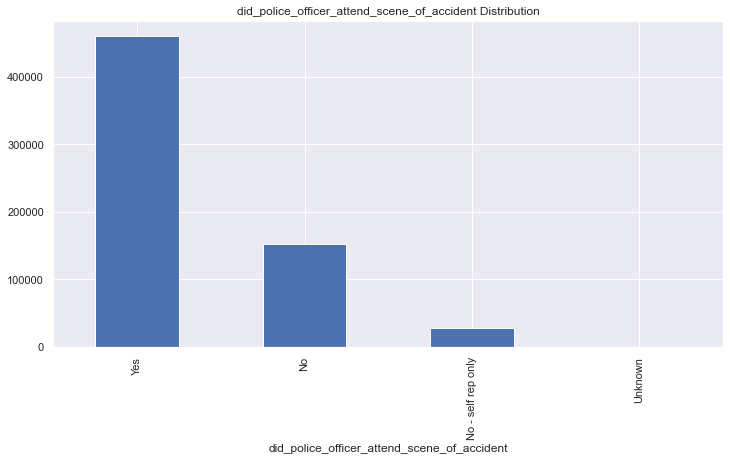

In [96]:
plt.figure(figsize=(12, 6))
accidents_last55.did_police_officer_attend_scene_of_accident.value_counts().plot(kind='bar')
plt.xlabel('did_police_officer_attend_scene_of_accident')
plt.title("did_police_officer_attend_scene_of_accident Distribution")
plt.show()

In [97]:
# recoding trunk_road_flag

accidents_last55['trunk_road_flag'] = accidents_last55['trunk_road_flag'].astype('category')
accidents_last55['trunk_road_flag'] = accidents_last55['trunk_road_flag'].cat.rename_categories({1: 'Trunk', 2: 'Non-Trunk', -1: 'Unknown'})

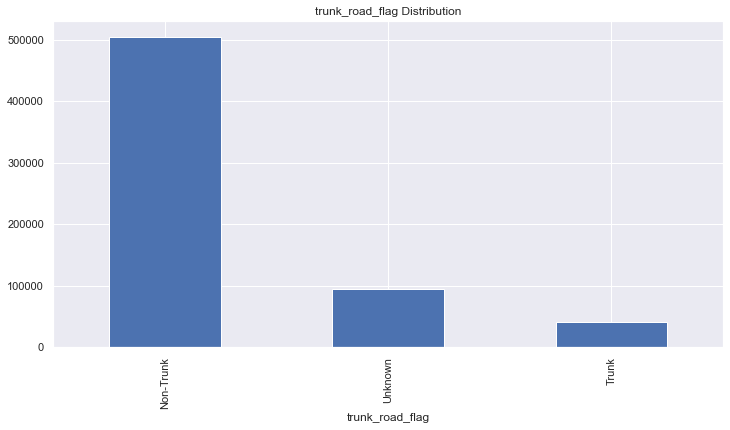

In [98]:
plt.figure(figsize=(12, 6))
accidents_last55.trunk_road_flag.value_counts().plot(kind='bar')
plt.xlabel('trunk_road_flag')
plt.title("trunk_road_flag Distribution")
plt.show()

In [99]:
accident_recode = Guide[Guide['table'] == 'Accident']

In [100]:
# recoding police_force

police_force_recode = accident_recode[accident_recode['field name'] == 'police_force']
police_force_recode = police_force_recode[['code/format','label']]

dico_police_force = police_force_recode.set_index('code/format').to_dict()

accidents_last55['police_force'] = accidents_last55['police_force'].astype('category')
accidents_last55['police_force'] = accidents_last55['police_force'].cat.rename_categories(dico_police_force['label'])

In [101]:
# recoding local_authority_district

local_authority_district_recode = accident_recode[accident_recode['field name'] == 'local_authority_district']
local_authority_district_recode = local_authority_district_recode[['code/format','label']]

dico_local_authority_district = local_authority_district_recode.set_index('code/format').to_dict()


accidents_last55['local_authority_district'] = accidents_last55['local_authority_district'].astype('category')
accidents_last55['local_authority_district'] = accidents_last55['local_authority_district'].cat.rename_categories(dico_local_authority_district['label'])

In [102]:
accidents_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640331 entries, 0 to 42357
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               640331 non-null  object        
 1   accident_year                                640331 non-null  int64         
 2   accident_reference                           640331 non-null  object        
 3   police_force                                 640331 non-null  category      
 4   accident_severity                            640331 non-null  category      
 5   number_of_vehicles                           640331 non-null  int64         
 6   number_of_casualties                         640331 non-null  int64         
 7   date                                         640331 non-null  datetime64[ns]
 8   day_of_week                                  640331 non-null  cat

# Vehicle data

In [103]:
# dropping status column

vehicle_last55 = vehicle_last55.drop(columns='status')

In [104]:
vehicle_recode = Guide[Guide['table'] == 'Vehicle']

In [105]:
# correcting mistaken field

vehicle_recode['label'][1303]='South'
vehicle_recode['label'][1313]='South'

In [106]:
# handling missing values

vehicle_last55['sex_of_driver'] = vehicle_last55['sex_of_driver'].replace([-1],3)
vehicle_last55['vehicle_left_hand_drive'] = vehicle_last55['vehicle_left_hand_drive'].replace([-1],9)
vehicle_last55['journey_purpose_of_driver'] = vehicle_last55['journey_purpose_of_driver'].replace([-1],15)



In [107]:
fields = pd.DataFrame(vehicle_recode['field name'].value_counts())
cat_fields = fields[fields['field name'] > 2]
cat_fields_name = list(cat_fields.index)

In [108]:
# Loop in order to recode the categorical features

for field_name in cat_fields_name:
    recode = vehicle_recode[vehicle_recode['field name'] == field_name]
    recode = recode[['code/format','label']]
    dico = recode.set_index('code/format').to_dict()
    vehicle_last55[field_name] = vehicle_last55[field_name].astype('category')
    vehicle_last55[field_name] = vehicle_last55[field_name].cat.rename_categories(dico['label'])

In [109]:
vehicle_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180002 entries, 0 to 78410
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   accident_index                    1180002 non-null  object  
 1   accident_year                     1180002 non-null  int64   
 2   accident_reference                1180002 non-null  object  
 3   vehicle_reference                 1180002 non-null  int64   
 4   vehicle_type                      1180002 non-null  category
 5   towing_and_articulation           1180002 non-null  category
 6   vehicle_manoeuvre                 1180002 non-null  category
 7   vehicle_direction_from            1180002 non-null  category
 8   vehicle_direction_to              1180002 non-null  category
 9   vehicle_location_restricted_lane  1180002 non-null  category
 10  junction_location                 1180002 non-null  category
 11  skidding_and_overturning  

In [110]:
vehicle_last55.isin([-1]).sum()

accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
vehicle_type                             0
towing_and_articulation                  0
vehicle_manoeuvre                        0
vehicle_direction_from                8533
vehicle_direction_to                 10473
vehicle_location_restricted_lane         0
junction_location                        0
skidding_and_overturning                 0
hit_object_in_carriageway                0
vehicle_leaving_carriageway              0
hit_object_off_carriageway               0
first_point_of_impact                    0
vehicle_left_hand_drive                  0
journey_purpose_of_driver                0
sex_of_driver                            0
age_of_driver                       150377
age_band_of_driver                       0
engine_capacity_cc                  340917
propulsion_code                          0
age_of_vehi

In [111]:
# age_of_vehicle


vehicle_last55.age_of_vehicle.describe()

count    1.180002e+06
mean     5.292252e+00
std      6.111243e+00
min     -1.000000e+00
25%     -1.000000e+00
50%      4.000000e+00
75%      1.000000e+01
max      9.600000e+01
Name: age_of_vehicle, dtype: float64

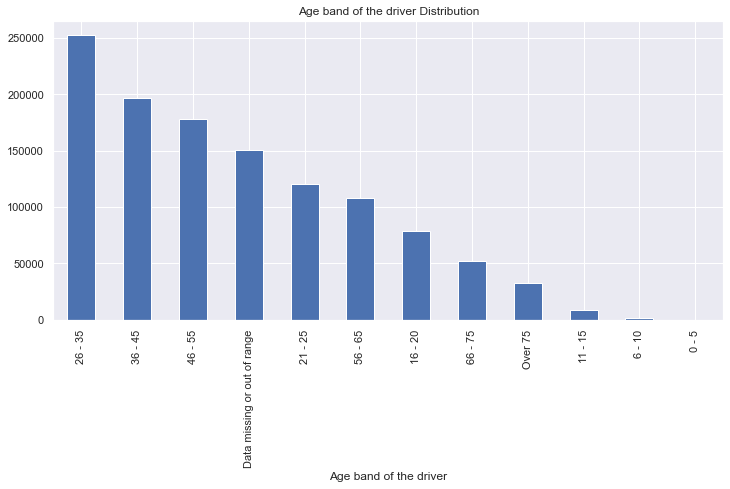

In [112]:
# age_band_of_driver

plt.figure(figsize=(12, 5.5))
vehicle_last55.age_band_of_driver.value_counts().plot(kind='bar')
plt.xlabel('Age band of the driver')
plt.title("Age band of the driver Distribution")
plt.show()

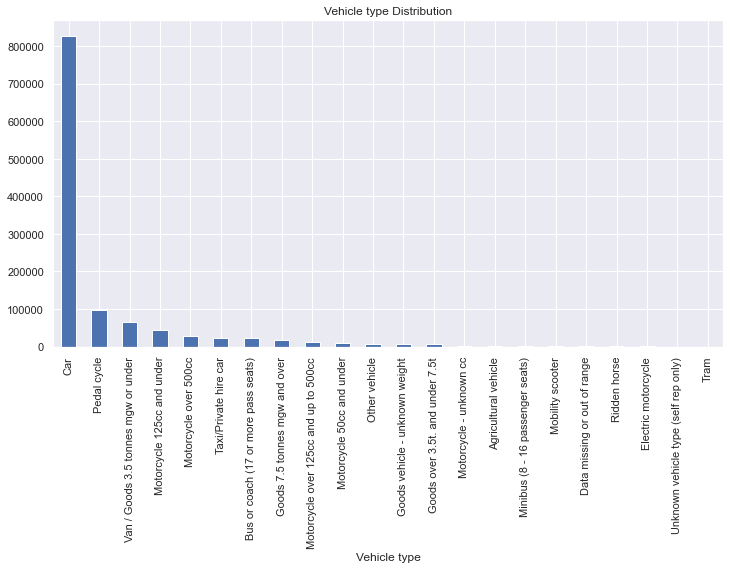

In [113]:
# vehicle_type

plt.figure(figsize=(12, 6))
vehicle_last55.vehicle_type.value_counts().plot(kind='bar')
plt.xlabel('Vehicle type')
plt.title("Vehicle type Distribution")
plt.show()

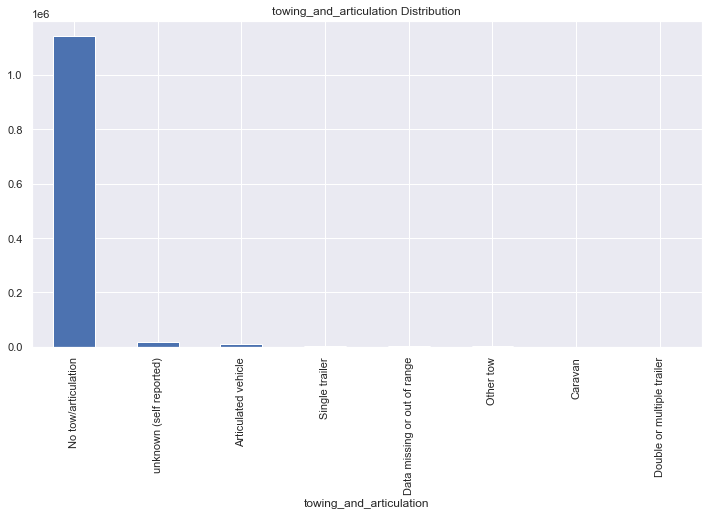

In [114]:
# towing_and_articulation

plt.figure(figsize=(12, 6))
vehicle_last55.towing_and_articulation.value_counts().plot(kind='bar')
plt.xlabel('towing_and_articulation')
plt.title("towing_and_articulation Distribution")
plt.show()

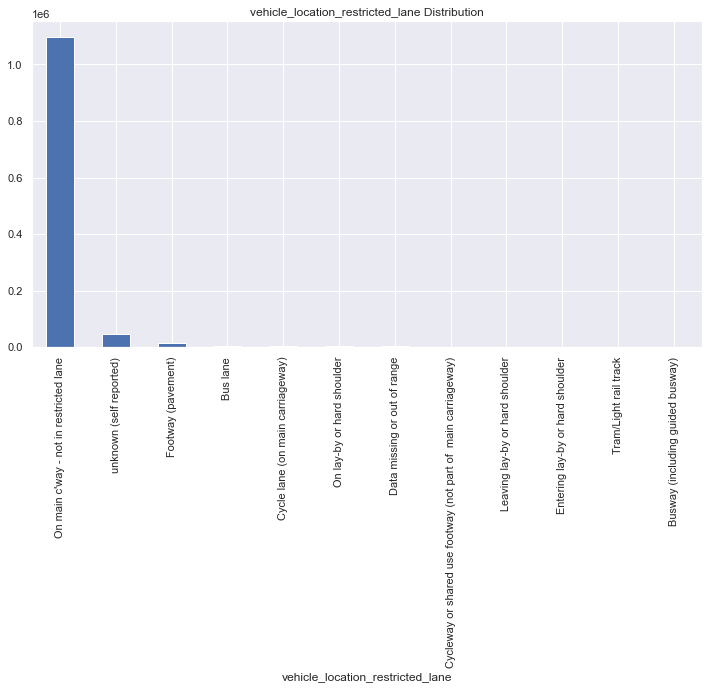

In [115]:
# vehicle_location_restricted_lane

plt.figure(figsize=(12, 6))
vehicle_last55.vehicle_location_restricted_lane.value_counts().plot(kind='bar')
plt.xlabel('vehicle_location_restricted_lane')
plt.title("vehicle_location_restricted_lane Distribution")
plt.show()

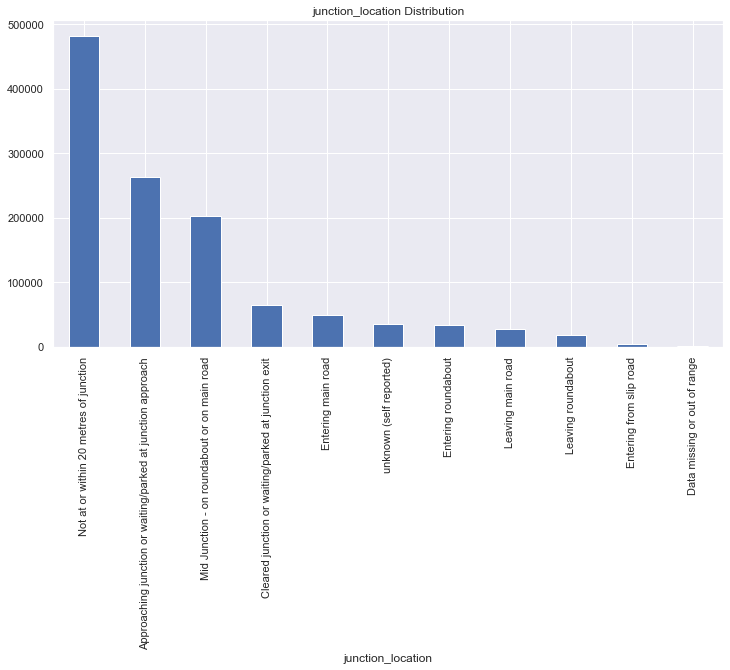

In [116]:
# junction_location

plt.figure(figsize=(12, 6))
vehicle_last55.junction_location.value_counts().plot(kind='bar')
plt.xlabel('junction_location')
plt.title("junction_location Distribution")
plt.show()

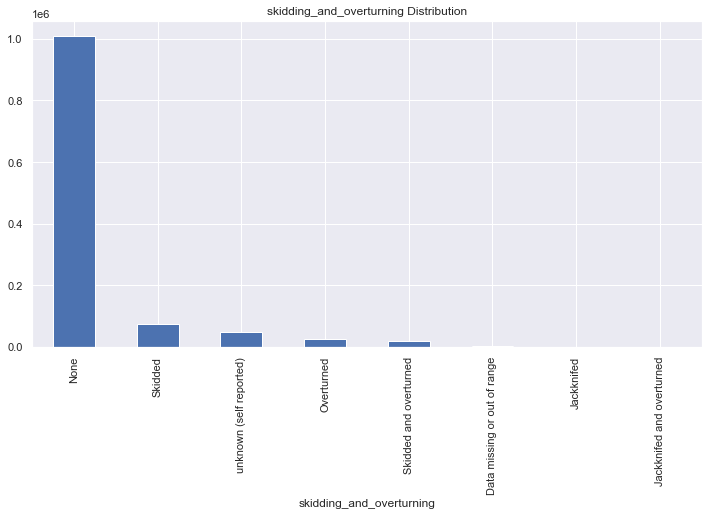

In [117]:
# skidding_and_overturning

plt.figure(figsize=(12, 6))
vehicle_last55.skidding_and_overturning.value_counts().plot(kind='bar')
plt.xlabel('skidding_and_overturning')
plt.title("skidding_and_overturning Distribution")
plt.show()

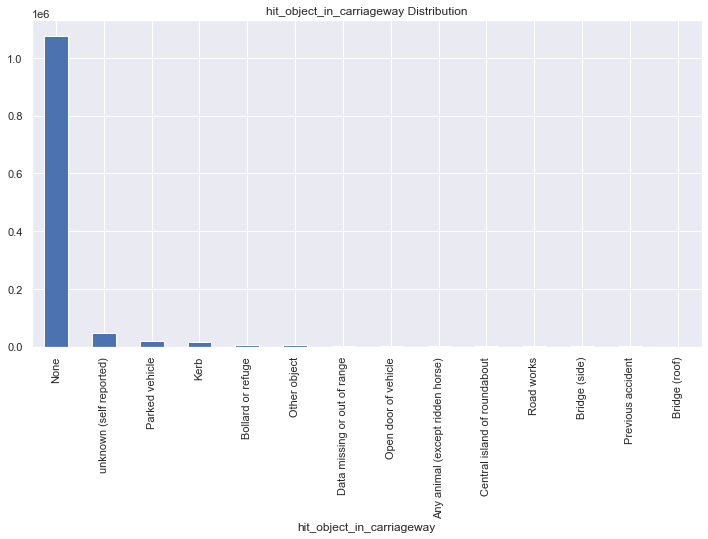

In [118]:
# hit_object_in_carriageway

plt.figure(figsize=(12, 6))
vehicle_last55.hit_object_in_carriageway.value_counts().plot(kind='bar')
plt.xlabel('hit_object_in_carriageway')
plt.title("hit_object_in_carriageway Distribution")
plt.show()

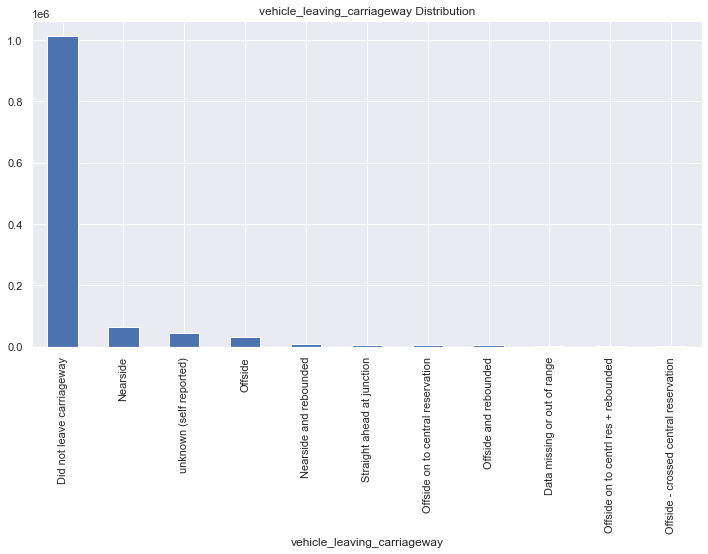

In [119]:
# vehicle_leaving_carriageway

plt.figure(figsize=(12, 6))
vehicle_last55.vehicle_leaving_carriageway.value_counts().plot(kind='bar')
plt.xlabel('vehicle_leaving_carriageway')
plt.title("vehicle_leaving_carriageway Distribution")
plt.show()

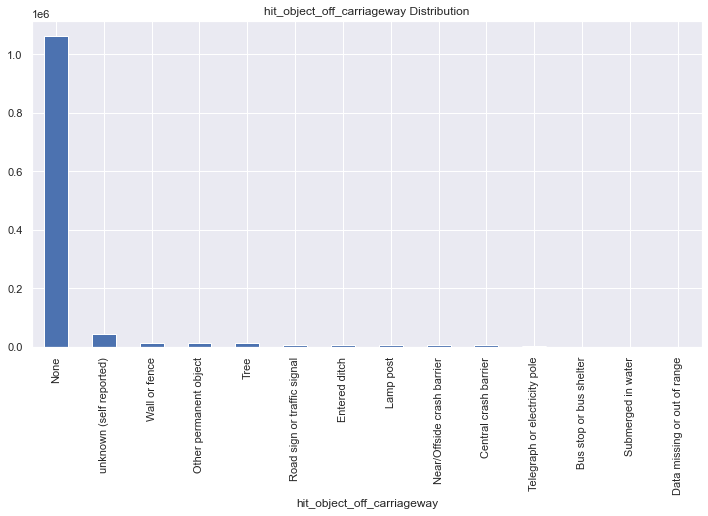

In [120]:
# hit_object_off_carriageway

plt.figure(figsize=(12, 6))
vehicle_last55.hit_object_off_carriageway.value_counts().plot(kind='bar')
plt.xlabel('hit_object_off_carriageway')
plt.title("hit_object_off_carriageway Distribution")
plt.show()

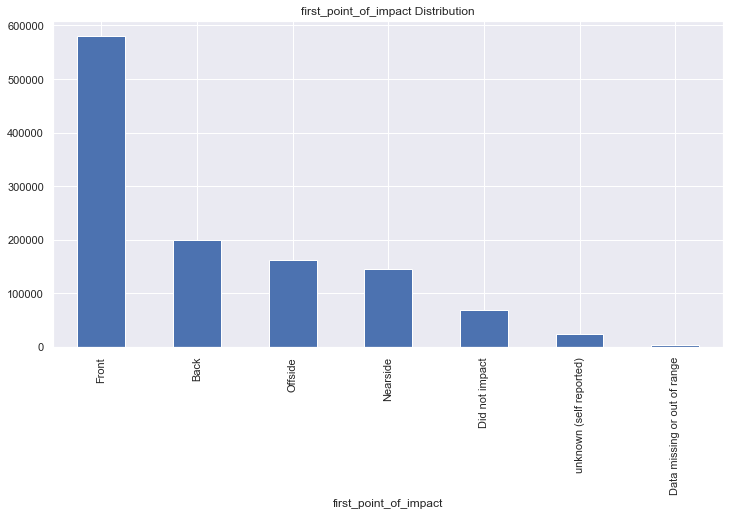

In [121]:
# first_point_of_impact

plt.figure(figsize=(12, 6))
vehicle_last55.first_point_of_impact.value_counts().plot(kind='bar')
plt.xlabel('first_point_of_impact')
plt.title("first_point_of_impact Distribution")
plt.show()

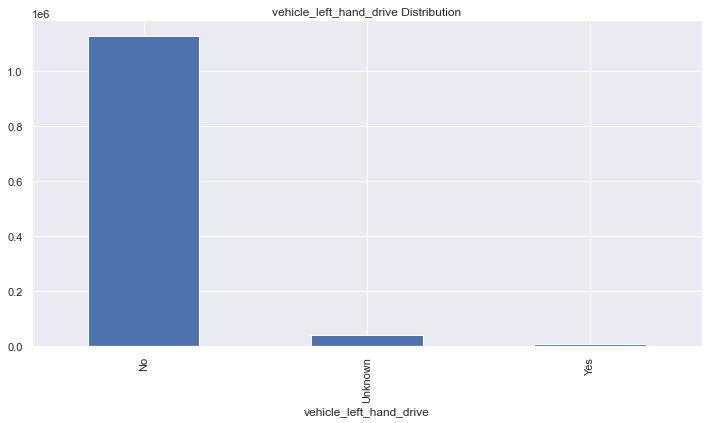

In [122]:
# vehicle_left_hand_drive

plt.figure(figsize=(12, 6))
vehicle_last55.vehicle_left_hand_drive.value_counts().plot(kind='bar')
plt.xlabel('vehicle_left_hand_drive')
plt.title("vehicle_left_hand_drive Distribution")
plt.show()

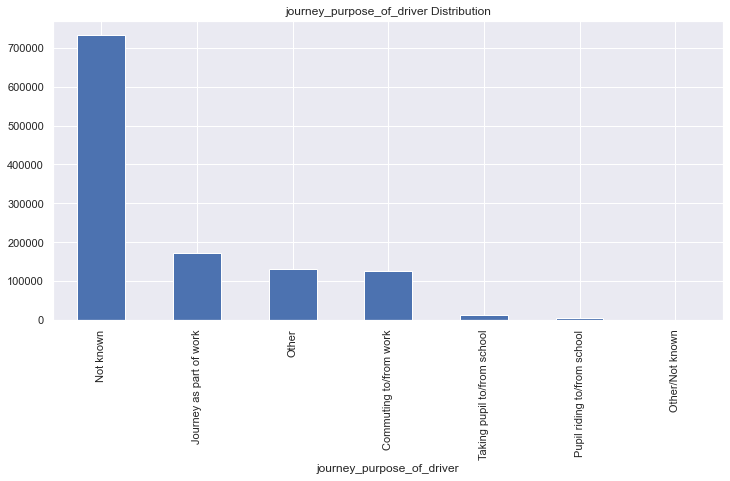

In [123]:
# journey_purpose_of_driver

plt.figure(figsize=(12, 5.5))
vehicle_last55.journey_purpose_of_driver.value_counts().plot(kind='bar')
plt.xlabel('journey_purpose_of_driver')
plt.title("journey_purpose_of_driver Distribution")
plt.show()

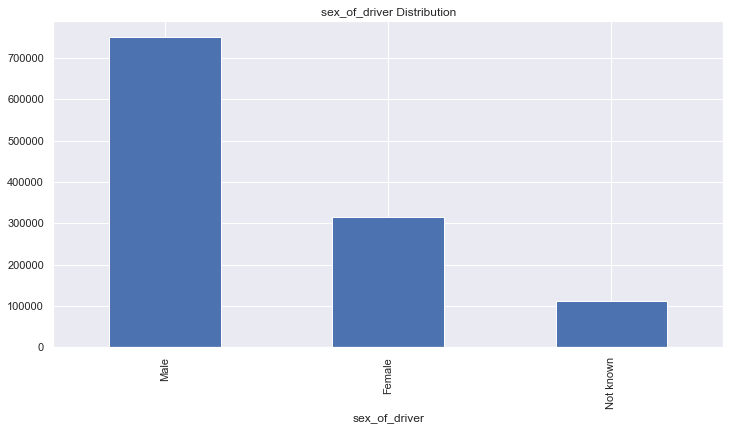

In [124]:
# sex_of_driver

plt.figure(figsize=(12, 6))
vehicle_last55.sex_of_driver.value_counts().plot(kind='bar')
plt.xlabel('sex_of_driver')
plt.title("sex_of_driver Distribution")
plt.show()

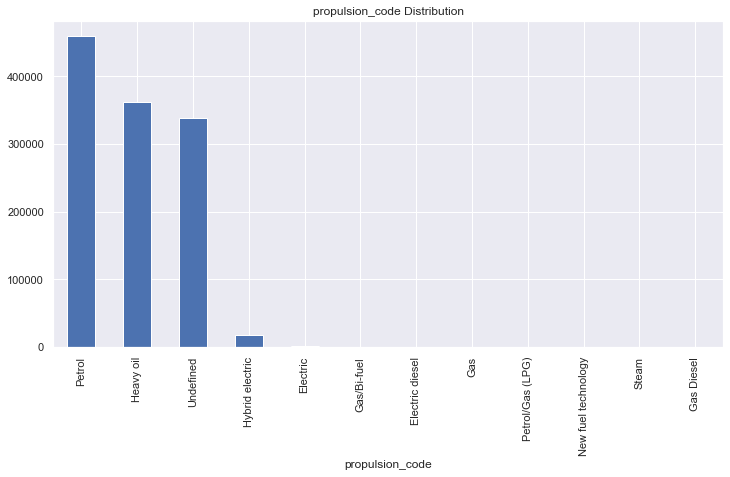

In [125]:
# propulsion_code

plt.figure(figsize=(12, 6))
vehicle_last55.propulsion_code.value_counts().plot(kind='bar')
plt.xlabel('propulsion_code')
plt.title("propulsion_code Distribution")
plt.show()

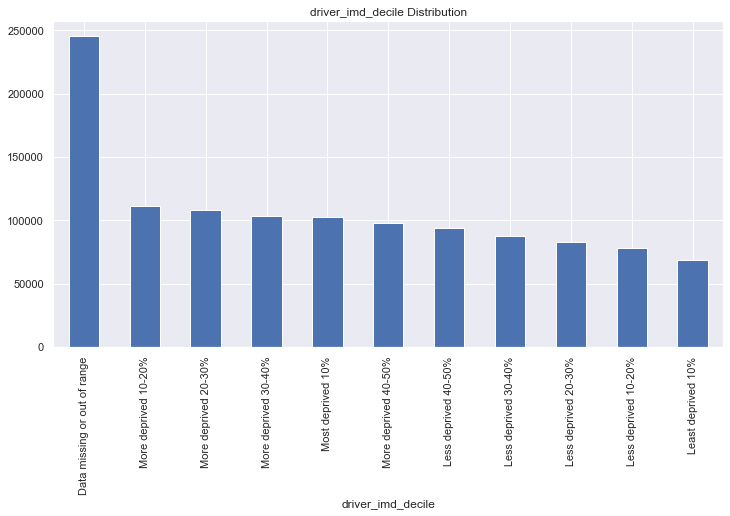

In [126]:
# driver_imd_decile

plt.figure(figsize=(12, 6))
vehicle_last55.driver_imd_decile.value_counts().plot(kind='bar')
plt.xlabel('driver_imd_decile')
plt.title("driver_imd_decile Distribution")
plt.show()

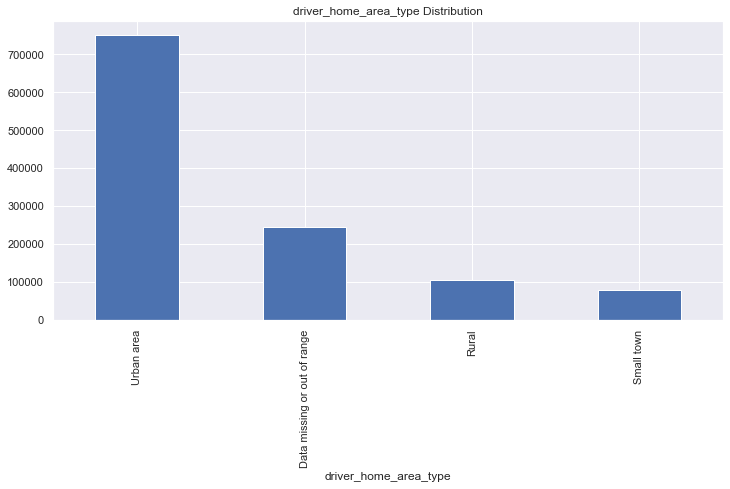

In [127]:
# driver_home_area_type

plt.figure(figsize=(12, 5.5))
vehicle_last55.driver_home_area_type.value_counts().plot(kind='bar')
plt.xlabel('driver_home_area_type')
plt.title("driver_home_area_type Distribution")
plt.show()

In [206]:
vehicle_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1180002 entries, 0 to 78410
Data columns (total 27 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   accident_index                    1180002 non-null  object  
 1   accident_year                     1180002 non-null  int64   
 2   accident_reference                1180002 non-null  object  
 3   vehicle_reference                 1180002 non-null  int64   
 4   vehicle_type                      1180002 non-null  category
 5   towing_and_articulation           1180002 non-null  category
 6   vehicle_manoeuvre                 1180002 non-null  category
 7   vehicle_direction_from            1180002 non-null  category
 8   vehicle_direction_to              1180002 non-null  category
 9   vehicle_location_restricted_lane  1180002 non-null  category
 10  junction_location                 1180002 non-null  category
 11  skidding_and_overturning  

# Casualties

In [128]:
casualty_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834890 entries, 0 to 53173
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      834890 non-null  object
 1   accident_year                       834890 non-null  int64 
 2   accident_reference                  834890 non-null  object
 3   vehicle_reference                   834890 non-null  int64 
 4   casualty_reference                  834890 non-null  int64 
 5   casualty_class                      834890 non-null  int64 
 6   sex_of_casualty                     834890 non-null  int64 
 7   age_of_casualty                     834890 non-null  int64 
 8   age_band_of_casualty                834890 non-null  int64 
 9   casualty_severity                   834890 non-null  int64 
 10  pedestrian_location                 834890 non-null  int64 
 11  pedestrian_movement                 8348

In [129]:
casualty_last55.isin([-1]).sum()

accident_index                             0
accident_year                              0
accident_reference                         0
vehicle_reference                          0
casualty_reference                         0
casualty_class                             0
sex_of_casualty                         1999
age_of_casualty                        14924
age_band_of_casualty                   14924
casualty_severity                          0
pedestrian_location                       16
pedestrian_movement                       18
car_passenger                           1968
bus_or_coach_passenger                   234
pedestrian_road_maintenance_worker       478
casualty_type                             19
casualty_home_area_type               103254
casualty_imd_decile                   103618
status                                     0
dtype: int64

In [130]:
# dropping status column

casualty_last55 = casualty_last55.drop(columns='status')

In [131]:
# handling missing values

casualty_last55['sex_of_casualty'] = casualty_last55['sex_of_casualty'].replace([-1],3)
casualty_last55['car_passenger'] = casualty_last55['car_passenger'].replace([-1],9)
casualty_last55['sex_of_casualty'] = casualty_last55['sex_of_casualty'].replace([3],9)

In [132]:
casualty_recode = Guide[Guide['table'] == 'Casualty']


In [133]:
casualty_fields = pd.DataFrame(casualty_recode['field name'].value_counts())
casualty_fields

,field name
casualty_type,30
age_band_of_casualty,12
pedestrian_location,12
pedestrian_movement,11
casualty_imd_decile,11
bus_or_coach_passenger,7
pedestrian_road_maintenance_worker,5
car_passenger,5
sex_of_casualty,4
casualty_home_area_type,4


In [134]:
casualty_cat_fields = casualty_fields[casualty_fields['field name'] > 2]
casualty_cat_fields_name = list(casualty_cat_fields.index)

In [135]:
casualty_cat_fields_name

['casualty_type',
 'age_band_of_casualty',
 'pedestrian_location',
 'pedestrian_movement',
 'casualty_imd_decile',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'car_passenger',
 'sex_of_casualty',
 'casualty_home_area_type',
 'casualty_class',
 'casualty_severity']

In [136]:
for field_name in casualty_cat_fields_name:
    recode = casualty_recode[casualty_recode['field name'] == field_name]
    recode = recode[['code/format','label']]
    casualty_dico = recode.set_index('code/format').to_dict()
    casualty_last55[field_name] = casualty_last55[field_name].astype('category')
    casualty_last55[field_name] = casualty_last55[field_name].cat.rename_categories(casualty_dico['label'])

In [137]:
casualty_last55.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834890 entries, 0 to 53173
Data columns (total 18 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   accident_index                      834890 non-null  object  
 1   accident_year                       834890 non-null  int64   
 2   accident_reference                  834890 non-null  object  
 3   vehicle_reference                   834890 non-null  int64   
 4   casualty_reference                  834890 non-null  int64   
 5   casualty_class                      834890 non-null  category
 6   sex_of_casualty                     834890 non-null  category
 7   age_of_casualty                     834890 non-null  int64   
 8   age_band_of_casualty                834890 non-null  category
 9   casualty_severity                   834890 non-null  category
 10  pedestrian_location                 834890 non-null  category
 11  pedestrian_mov

In [138]:
casualty_last55.casualty_class.dtype

CategoricalDtype(categories=['Driver or rider', 'Passenger', 'Pedestrian'], ordered=False)

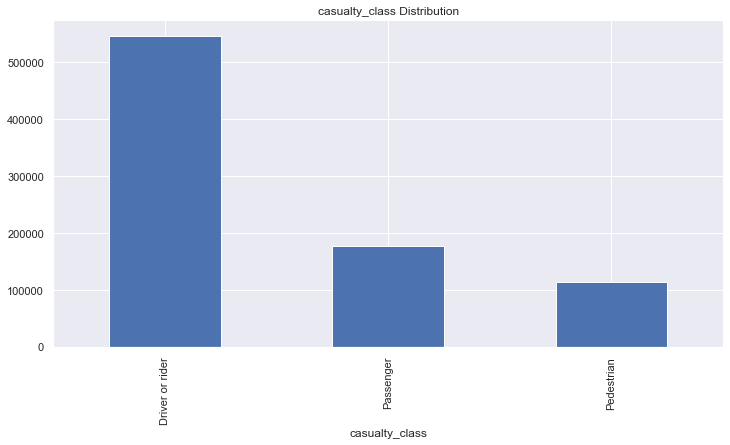

In [139]:
# casualty_class

plt.figure(figsize=(12, 6))
casualty_last55.casualty_class.value_counts().plot(kind='bar')
plt.xlabel('casualty_class')
plt.title("casualty_class Distribution")
plt.show()

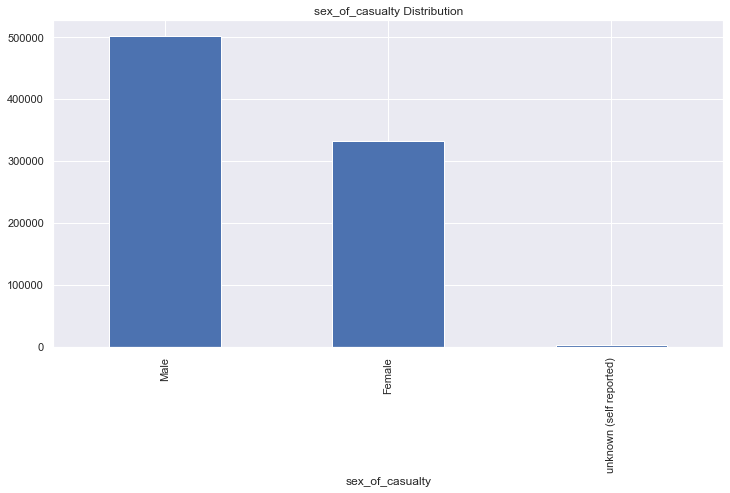

In [140]:
# sex_of_casualty

plt.figure(figsize=(12, 6))
casualty_last55.sex_of_casualty.value_counts().plot(kind='bar')
plt.xlabel('sex_of_casualty')
plt.title("sex_of_casualty Distribution")
plt.show()

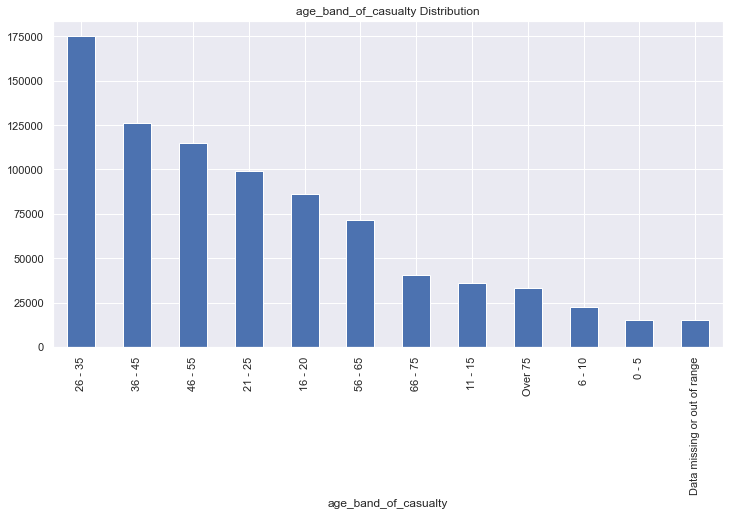

In [141]:
# age_band_of_casualty

plt.figure(figsize=(12, 6))
casualty_last55.age_band_of_casualty.value_counts().plot(kind='bar')
plt.xlabel('age_band_of_casualty')
plt.title("age_band_of_casualty Distribution")
plt.show()
#plt.savefig('age_band_of_casualty.png',bbox_inches='tight')

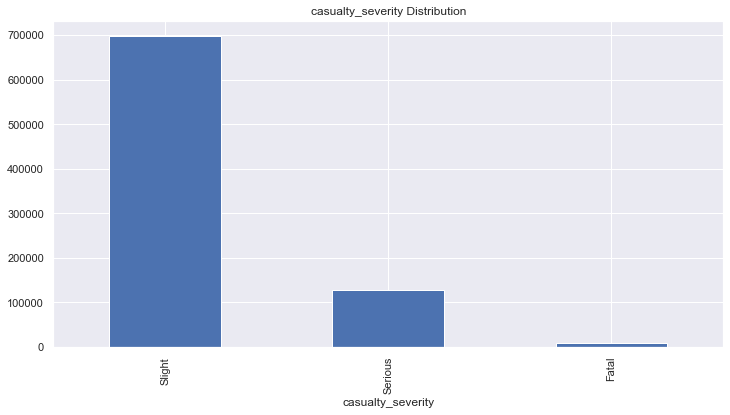

In [142]:
# casualty_severity

plt.figure(figsize=(12, 6))
casualty_last55.casualty_severity.value_counts().plot(kind='bar')
plt.xlabel('casualty_severity')
plt.title("casualty_severity Distribution")
plt.show()

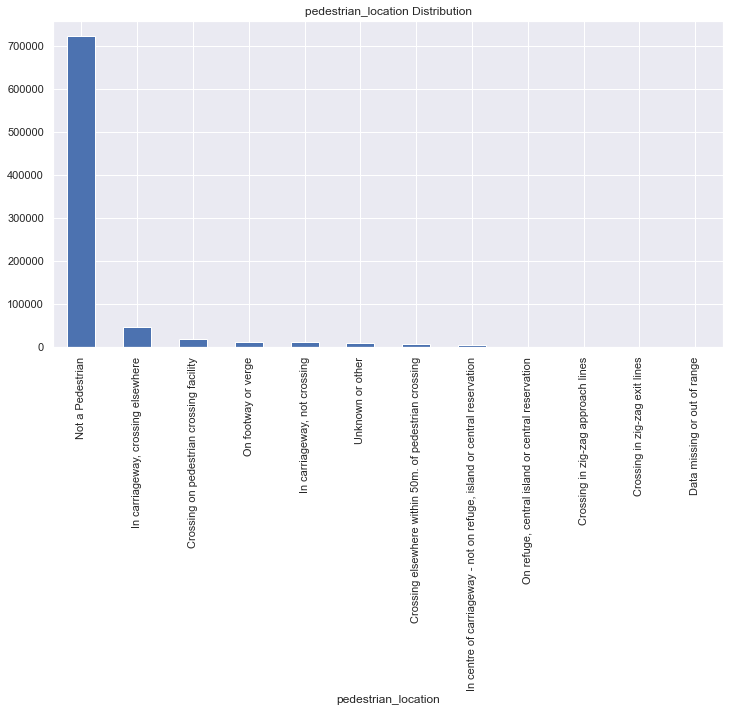

In [143]:
# pedestrian_location

plt.figure(figsize=(12, 6))
casualty_last55.pedestrian_location.value_counts().plot(kind='bar')
plt.xlabel('pedestrian_location')
plt.title("pedestrian_location Distribution")
plt.show()

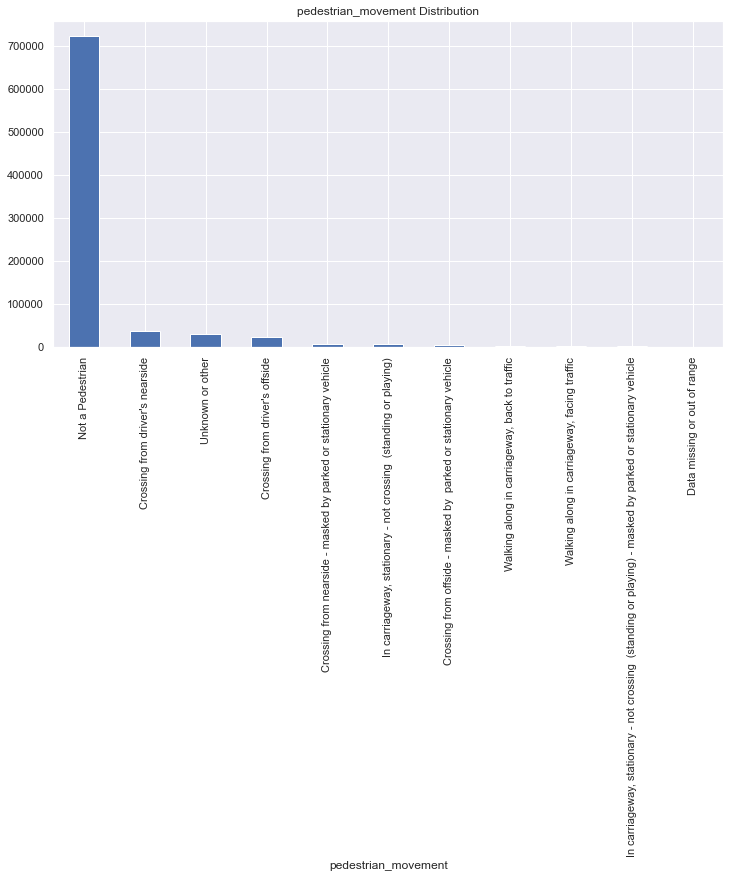

In [144]:
# pedestrian_movement

plt.figure(figsize=(12, 6))
casualty_last55.pedestrian_movement.value_counts().plot(kind='bar')
plt.xlabel('pedestrian_movement')
plt.title("pedestrian_movement Distribution")
plt.show()

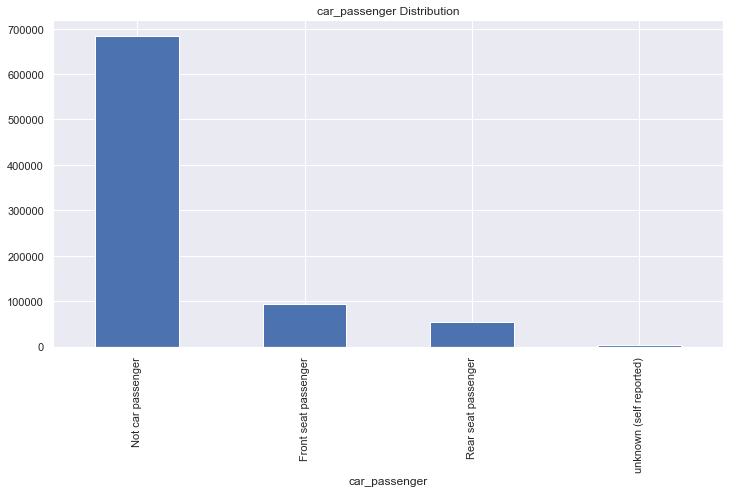

In [145]:
# car_passenger

plt.figure(figsize=(12, 6))
casualty_last55.car_passenger.value_counts().plot(kind='bar')
plt.xlabel('car_passenger')
plt.title("car_passenger Distribution")
plt.show()

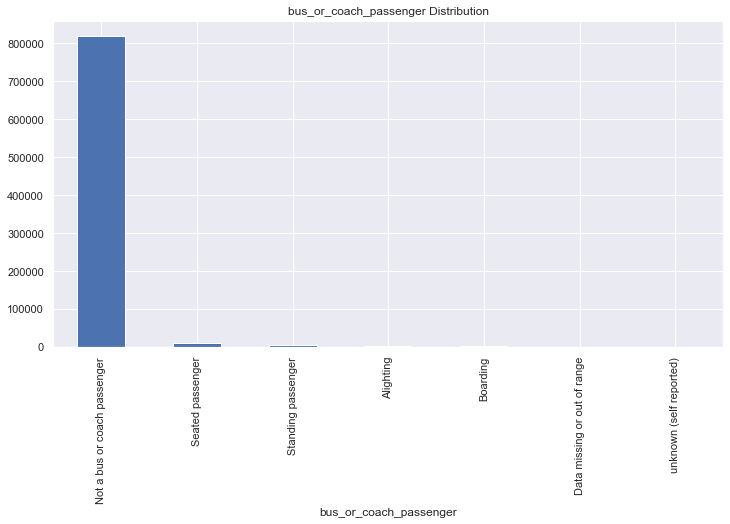

In [146]:
# bus_or_coach_passenger

plt.figure(figsize=(12, 6))
casualty_last55.bus_or_coach_passenger.value_counts().plot(kind='bar')
plt.xlabel('bus_or_coach_passenger')
plt.title("bus_or_coach_passenger Distribution")
plt.show()

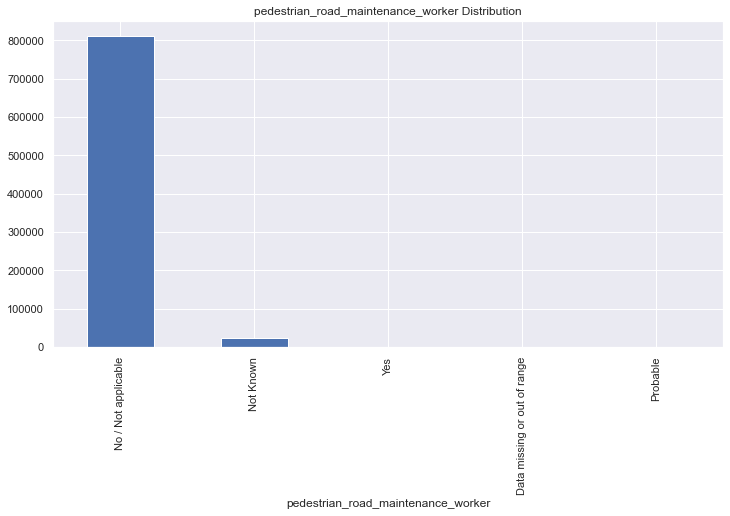

In [147]:
# pedestrian_road_maintenance_worker

plt.figure(figsize=(12, 6))
casualty_last55.pedestrian_road_maintenance_worker.value_counts().plot(kind='bar')
plt.xlabel('pedestrian_road_maintenance_worker')
plt.title("pedestrian_road_maintenance_worker Distribution")
plt.show()

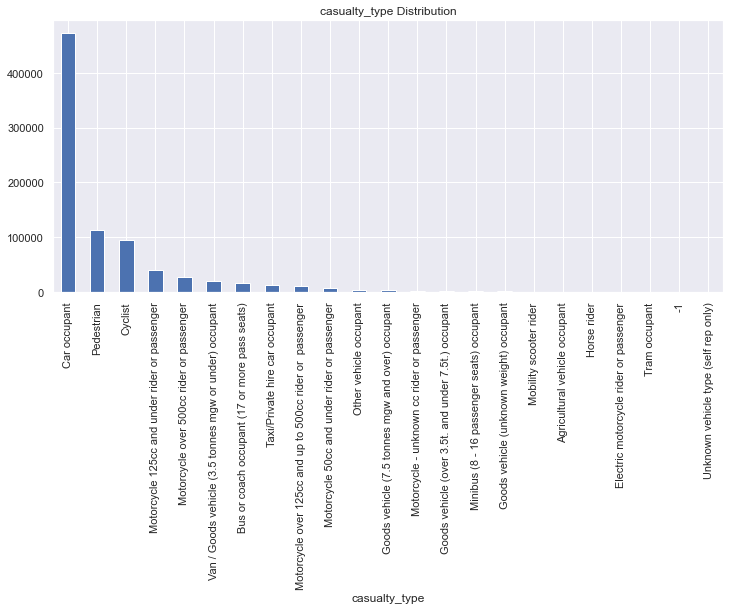

In [148]:
# casualty_type

plt.figure(figsize=(12, 5))
casualty_last55.casualty_type.value_counts().plot(kind='bar')
plt.xlabel('casualty_type')
plt.title("casualty_type Distribution")
plt.show()
#plt.savefig('casualty type.png', bbox_inches='tight')

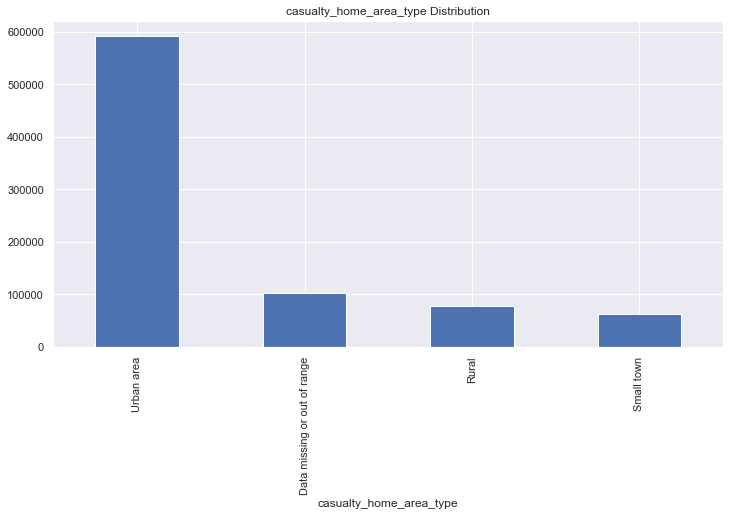

In [149]:
# casualty_home_area_type

plt.figure(figsize=(12, 6))
casualty_last55.casualty_home_area_type.value_counts().plot(kind='bar')
plt.xlabel('casualty_home_area_type')
plt.title("casualty_home_area_type Distribution")
plt.show()

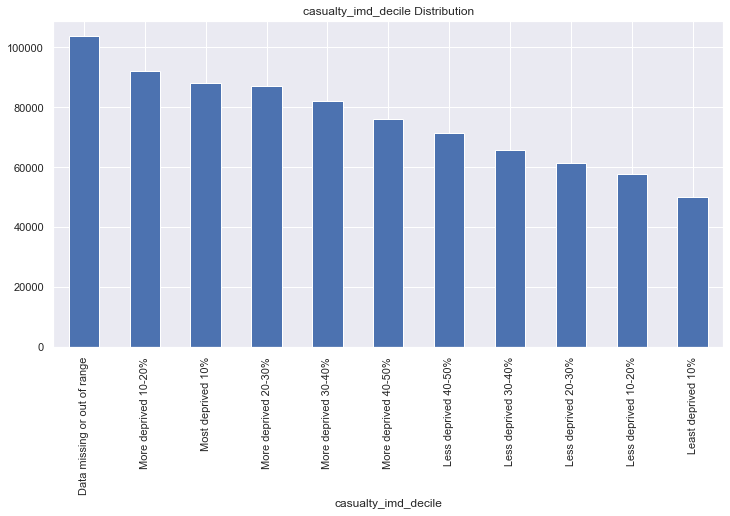

In [150]:
# casualty_imd_decile

plt.figure(figsize=(12, 6))
casualty_last55.casualty_imd_decile.value_counts().plot(kind='bar')
plt.xlabel('casualty_imd_decile')
plt.title("casualty_imd_decile Distribution")
plt.show()

In [151]:
pd.crosstab(casualty_last55.casualty_severity, casualty_last55.casualty_class).apply(lambda r: r/r.sum(), axis=1)

casualty_class,Driver or rider,Passenger,Pedestrian
casualty_severity,,,
Fatal,0.597920,0.148440,0.253640
Serious,0.639391,0.144149,0.216460
Slight,0.657328,0.223911,0.118761


In [152]:
pd.crosstab(casualty_last55.casualty_severity, casualty_last55.sex_of_casualty).apply(lambda r: r/r.sum(), axis=1)

sex_of_casualty,Male,Female,unknown (self reported)
casualty_severity,,,
Fatal,0.750520,0.249480,0.000000
Serious,0.693098,0.306552,0.000350
Slight,0.581225,0.415940,0.002834


In [153]:
pd.crosstab(casualty_last55.casualty_severity, casualty_last55.age_band_of_casualty).apply(lambda r: r/r.sum(), axis=1)

age_band_of_casualty,Data missing or out of range,0 - 5,6 - 10,11 - 15,16 - 20,21 - 25,26 - 35,36 - 45,46 - 55,56 - 65,66 - 75,Over 75
casualty_severity,,,,,,,,,,,,
Fatal,0.000328,0.007663,0.005802,0.014450,0.077614,0.100930,0.165517,0.123153,0.134975,0.117351,0.098960,0.153257
Serious,0.008575,0.013738,0.022095,0.047705,0.108759,0.111068,0.183605,0.132845,0.140852,0.101839,0.066815,0.062103
Slight,0.019821,0.019147,0.027866,0.042346,0.102140,0.120385,0.215021,0.155002,0.137382,0.081999,0.044825,0.034065


In [154]:
pd.crosstab(casualty_last55.casualty_severity, casualty_last55.casualty_type).apply(lambda r: r/r.sum(), axis=0)

casualty_type,-1,Pedestrian,Cyclist,Motorcycle 50cc and under rider or passenger,Motorcycle 125cc and under rider or passenger,Motorcycle over 125cc and up to 500cc rider or passenger,Motorcycle over 500cc rider or passenger,Taxi/Private hire car occupant,Car occupant,Minibus (8 - 16 passenger seats) occupant,...,Tram occupant,Van / Goods vehicle (3.5 tonnes mgw or under) occupant,Goods vehicle (over 3.5t. and under 7.5t.) occupant,Goods vehicle (7.5 tonnes mgw and over) occupant,Mobility scooter rider,Electric motorcycle rider or passenger,Other vehicle occupant,Motorcycle - unknown cc rider or passenger,Goods vehicle (unknown weight) occupant,Unknown vehicle type (self rep only)
casualty_severity,,,,,,,,,,,,,,,,,,,,,
Fatal,0.000000,0.020513,0.006180,0.003915,0.006419,0.018115,0.042686,0.003640,0.008273,0.016689,...,0.000000,0.010367,0.010444,0.022510,0.046534,0.005362,0.018607,0.024744,0.010541,0.0
Serious,0.105263,0.246496,0.210797,0.228762,0.252842,0.309465,0.403063,0.058325,0.097747,0.082777,...,0.073171,0.106159,0.135117,0.176688,0.205128,0.249330,0.228070,0.422808,0.141954,0.2
Slight,0.894737,0.732990,0.783024,0.767324,0.740739,0.672420,0.554251,0.938034,0.893980,0.900534,...,0.926829,0.883473,0.854439,0.800802,0.748338,0.745308,0.753323,0.552448,0.847505,0.8


# cross accident severity

In [155]:
accidents_last55[['accident_severity','number_of_vehicles']].groupby('accident_severity').describe()

number_of_vehicles                                          \
                               count      mean       std  min  25%  50%  75%   
accident_severity                                                              
Fatal                         8626.0  1.774751  0.980112  1.0  1.0  2.0  2.0   
Serious                     116866.0  1.732557  0.750773  1.0  1.0  2.0  2.0   
Slight                      514839.0  1.868965  0.689805  1.0  1.0  2.0  2.0   

                         
                    max  
accident_severity        
Fatal              23.0  
Serious            24.0  
Slight             16.0

In [156]:
accidents_last55[['accident_severity','number_of_casualties']].groupby('accident_severity').describe()

number_of_casualties                                     \
                                 count      mean       std  min  25%  50%   
accident_severity                                                           
Fatal                           8626.0  1.677371  1.269354  1.0  1.0  1.0   
Serious                       116866.0  1.374018  0.932330  1.0  1.0  1.0   
Slight                        514839.0  1.281653  0.685666  1.0  1.0  1.0   

                              
                   75%   max  
accident_severity             
Fatal              2.0  20.0  
Serious            1.0  59.0  
Slight             1.0  42.0

In [157]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.day_of_week).apply(lambda r: r/r.sum(), axis=0)

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
accident_severity,,,,,,,
Fatal,0.018307,0.012897,0.011778,0.011730,0.012426,0.012278,0.016523
Serious,0.207999,0.175268,0.176187,0.176461,0.175762,0.178892,0.194749
Slight,0.773694,0.811835,0.812035,0.811809,0.811812,0.808831,0.788728


In [158]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.day_of_week).apply(lambda r: r/r.sum(), axis=1)

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
accident_severity,,,,,,,
Fatal,0.152446,0.134941,0.129144,0.130767,0.140621,0.149316,0.162764
Serious,0.127847,0.135360,0.142599,0.145200,0.146809,0.160586,0.141598
Slight,0.107948,0.142322,0.149188,0.151632,0.153922,0.164813,0.130175


In [159]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.road_type).apply(lambda r: r/r.sum(), axis=0)

road_type,Roundabout,One way street,Dual carriageway,Single carriageway,Slip road,Unknown
accident_severity,,,,,,
Fatal,0.003592,0.005895,0.017523,0.014020,0.010384,0.003509
Serious,0.132300,0.153776,0.163948,0.194756,0.132456,0.095250
Slight,0.864108,0.840329,0.818529,0.791224,0.857159,0.901241


In [160]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.road_type).apply(lambda r: r/r.sum(), axis=1)

road_type,Roundabout,One way street,Dual carriageway,Single carriageway,Slip road,Unknown
accident_severity,,,,,,
Fatal,0.016578,0.010550,0.199165,0.758521,0.010434,0.004753
Serious,0.045069,0.020314,0.137542,0.777728,0.009823,0.009524
Slight,0.066819,0.025198,0.155876,0.717222,0.014430,0.020455


In [161]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.speed_limit).apply(lambda r: r/r.sum(), axis=0)

speed_limit,Unkown,20.0,30.0,40.0,50.0,60.0,70.0
accident_severity,,,,,,,
Fatal,0.000000,0.004530,0.007597,0.015755,0.026032,0.035716,0.026221
Serious,0.090909,0.155513,0.169412,0.194058,0.196422,0.256482,0.171794
Slight,0.909091,0.839957,0.822991,0.790187,0.777545,0.707801,0.801985


In [162]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.speed_limit).apply(lambda r: r/r.sum(), axis=1)


speed_limit,Unkown,20.0,30.0,40.0,50.0,60.0,70.0
accident_severity,,,,,,,
Fatal,0.000000,0.029562,0.337584,0.098307,0.079295,0.335497,0.119754
Serious,0.000163,0.074906,0.555653,0.089376,0.044162,0.177828,0.057912
Slight,0.000369,0.091838,0.612735,0.082610,0.039682,0.111396,0.061369


In [163]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.light_conditions).apply(lambda r: r/r.sum(), axis=0)

light_conditions,Daylight,Darkness: street lights present and lit,Darkness: street lights present but unlit,Darkness: no street lighting,Darkness: street lighting unknown
accident_severity,,,,,
Fatal,0.011009,0.013528,0.023522,0.047613,0.011729
Serious,0.176295,0.191006,0.204077,0.250687,0.141884
Slight,0.812696,0.795466,0.772401,0.701700,0.846387


In [164]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.light_conditions).apply(lambda r: r/r.sum(), axis=1)

light_conditions,Daylight,Darkness: street lights present and lit,Darkness: street lights present but unlit,Darkness: no street lighting,Darkness: street lighting unknown
accident_severity,,,,,
Fatal,0.588569,0.202411,0.012173,0.178878,0.017969
Serious,0.695703,0.210942,0.007795,0.069516,0.016044
Slight,0.727995,0.199414,0.006697,0.044169,0.021725


In [165]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.weather_conditions).apply(lambda r: r/r.sum(), axis=0)

weather_conditions,Fine without high winds,Raining without high winds,Snowing without high winds,Fine with high winds,Raining with high winds,Snowing with high winds,Fog or mist,Other
accident_severity,,,,,,,,
Fatal,0.013780,0.011707,0.012266,0.021606,0.021504,0.004,0.032348,0.007894
Serious,0.186454,0.173413,0.153325,0.206527,0.205725,0.156,0.198957,0.133870
Slight,0.799766,0.814880,0.834409,0.771867,0.772771,0.840,0.768696,0.858237


In [166]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.weather_conditions).apply(lambda r: r/r.sum(), axis=1)

weather_conditions,Fine without high winds,Raining without high winds,Snowing without high winds,Fine with high winds,Raining with high winds,Snowing with high winds,Fog or mist,Other
accident_severity,,,,,,,,
Fatal,0.820195,0.098539,0.004405,0.016810,0.018201,0.000348,0.010781,0.030721
Serious,0.819135,0.107739,0.004064,0.011860,0.012852,0.001001,0.004894,0.038454
Slight,0.797560,0.114921,0.005021,0.010061,0.010959,0.001224,0.004293,0.055961


In [167]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.road_surface_conditions).apply(lambda r: r/r.sum(), axis=0)

road_surface_conditions,Dry,Wet / Damp,Snow,Frost / Ice,Flood,Unknown
accident_severity,,,,,,
Fatal,0.012954,0.015657,0.007761,0.010810,0.017115,0.001708
Serious,0.183228,0.186170,0.141250,0.169708,0.191932,0.080712
Slight,0.803818,0.798173,0.850990,0.819482,0.790954,0.917580


In [168]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.road_surface_conditions).apply(lambda r: r/r.sum(), axis=1)

road_surface_conditions,Dry,Wet / Damp,Snow,Frost / Ice,Flood,Unknown
accident_severity,,,,,,
Fatal,0.689427,0.294459,0.002319,0.010781,0.001623,0.001391
Serious,0.719773,0.258424,0.003115,0.012493,0.001343,0.004852
Slight,0.716770,0.251500,0.004260,0.013694,0.001257,0.012520


In [169]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.urban_or_rural_area).apply(lambda r: r/r.sum(), axis=0)

urban_or_rural_area,Urban,Rural,Unallocated
accident_severity,,,
Fatal,0.007579,0.025544,0.012620
Serious,0.163243,0.216344,0.206037
Slight,0.829177,0.758111,0.781343


In [170]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.urban_or_rural_area).apply(lambda r: r/r.sum(), axis=1)

urban_or_rural_area,Urban,Rural,Unallocated
accident_severity,,,
Fatal,0.351264,0.586599,0.062138
Serious,0.558417,0.366702,0.074881
Slight,0.643854,0.291687,0.064459


In [171]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.did_police_officer_attend_scene_of_accident).apply(lambda r: r/r.sum(), axis=0)

did_police_officer_attend_scene_of_accident,Unknown,Yes,No,No - self rep only
accident_severity,,,,
Fatal,0.125,0.016893,0.005586,0.000217
Serious,0.250,0.209657,0.122369,0.064235
Slight,0.625,0.773450,0.872045,0.935548


In [172]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.did_police_officer_attend_scene_of_accident).apply(lambda r: r/r.sum(), axis=1)

did_police_officer_attend_scene_of_accident,Unknown,Yes,No,No - self rep only
accident_severity,,,,
Fatal,0.000116,0.900070,0.099119,0.000696
Serious,0.000017,0.824500,0.160278,0.015205
Slight,0.000010,0.690447,0.259273,0.050270


In [173]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.Month).apply(lambda r: r/r.sum(), axis=0)

Month,01/2016,01/2017,01/2018,01/2019,01/2020,01/2021,02/2016,02/2017,02/2018,02/2019,...,11/2016,11/2017,11/2018,11/2019,11/2020,12/2016,12/2017,12/2018,12/2019,12/2020
accident_severity,,,,,,,,,,,,,,,,,,,,,
Fatal,0.011636,0.011842,0.012259,0.017714,0.015223,0.016067,0.012105,0.013142,0.012100,0.015162,...,0.011459,0.013631,0.013700,0.012161,0.014980,0.014983,0.014040,0.016554,0.015243,0.015502
Serious,0.145448,0.157800,0.170638,0.179597,0.186946,0.193902,0.143098,0.158316,0.174589,0.184205,...,0.156503,0.170681,0.180963,0.180305,0.200788,0.155213,0.164565,0.185481,0.190433,0.186393
Slight,0.842916,0.830358,0.817103,0.802689,0.797831,0.790031,0.844797,0.828542,0.813310,0.800634,...,0.832038,0.815688,0.805337,0.807534,0.784231,0.829804,0.821394,0.797966,0.794324,0.798105


In [174]:
pd.crosstab(accidents_last55.accident_severity, accidents_last55.Month).apply(lambda r: r/r.sum(), axis=1)

Month,01/2016,01/2017,01/2018,01/2019,01/2020,01/2021,02/2016,02/2017,02/2018,02/2019,...,11/2016,11/2017,11/2018,11/2019,11/2020,12/2016,12/2017,12/2018,12/2019,12/2020
accident_severity,,,,,,,,,,,,,,,,,,,,,
Fatal,0.015766,0.015303,0.014375,0.019244,0.016926,0.010202,0.014955,0.014839,0.012984,0.015534,...,0.016926,0.018896,0.017737,0.015419,0.013216,0.019360,0.017042,0.019244,0.017621,0.014607
Serious,0.014547,0.015051,0.014769,0.014401,0.015342,0.009087,0.013049,0.013195,0.013828,0.013930,...,0.017062,0.017464,0.017293,0.016874,0.013075,0.014803,0.014743,0.015916,0.016249,0.012964
Slight,0.019136,0.017978,0.016054,0.014610,0.014863,0.008405,0.017487,0.015675,0.014622,0.013744,...,0.020591,0.018946,0.017470,0.017155,0.011592,0.017965,0.016704,0.015543,0.015385,0.012600


# accidents and vehicle data

In [175]:
vehicle = vehicle_last55.drop(columns=['accident_year','accident_reference'])

In [176]:
merged = pd.merge(vehicle, accidents_last55, on='accident_index', how='outer')


In [177]:
len(set(vehicle_last55.accident_reference.unique()) - set(accidents_last55.accident_reference.unique()))

75518

In [178]:
merged.vehicle_reference.isna().sum()

75518

In [179]:
len(merged)

1255520

In [180]:
merged_clean = merged.dropna()

In [181]:
merged_clean = merged_clean.dropna(subset = ['accident_reference'])

In [182]:
len(merged) - len(merged_clean)

212821

In [183]:
merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042699 entries, 0 to 1180001
Data columns (total 59 columns):
 #   Column                                       Non-Null Count    Dtype         
---  ------                                       --------------    -----         
 0   accident_index                               1042699 non-null  object        
 1   vehicle_reference                            1042699 non-null  float64       
 2   vehicle_type                                 1042699 non-null  category      
 3   towing_and_articulation                      1042699 non-null  category      
 4   vehicle_manoeuvre                            1042699 non-null  category      
 5   vehicle_direction_from                       1042699 non-null  category      
 6   vehicle_direction_to                         1042699 non-null  category      
 7   vehicle_location_restricted_lane             1042699 non-null  category      
 8   junction_location                            1042699

In [184]:
pd.crosstab(merged_clean.accident_severity, merged_clean.age_band_of_driver).apply(lambda r: r/r.sum(), axis=1)

age_band_of_driver,Data missing or out of range,0 - 5,6 - 10,11 - 15,16 - 20,21 - 25,26 - 35,36 - 45,46 - 55,56 - 65,66 - 75,Over 75
accident_severity,,,,,,,,,,,,
Fatal,0.045281,0.000139,0.000347,0.002639,0.058962,0.101604,0.199111,0.154733,0.172304,0.132856,0.071811,0.060213
Serious,0.086279,0.000275,0.001873,0.009425,0.074596,0.103070,0.200406,0.159074,0.161639,0.109200,0.056602,0.037559
Slight,0.130539,0.000225,0.001894,0.008006,0.066980,0.101895,0.214998,0.166929,0.149770,0.088975,0.043301,0.026489


In [185]:
pd.crosstab(merged_clean.accident_severity, merged_clean.journey_purpose_of_driver).apply(lambda r: r/r.sum(), axis=1)

journey_purpose_of_driver,Journey as part of work,Commuting to/from work,Taking pupil to/from school,Pupil riding to/from school,Other,Not known,Other/Not known
accident_severity,,,,,,,
Fatal,0.192652,0.076047,0.002361,0.000972,0.130495,0.597264,0.000208
Serious,0.142063,0.112419,0.008124,0.003356,0.152950,0.581001,0.000088
Slight,0.144863,0.105331,0.011266,0.003872,0.107257,0.627268,0.000143


In [186]:
pd.crosstab(merged_clean.accident_severity, merged_clean.sex_of_driver).apply(lambda r: r/r.sum(), axis=1)

sex_of_driver,Male,Female,Not known
accident_severity,,,
Fatal,0.788041,0.174665,0.037294
Serious,0.699588,0.229957,0.070455
Slight,0.620926,0.284679,0.094395


In [187]:
# for the models sake we are going to work on 2019 data since it is the closest to todays enviroment

merged_clean = merged_clean[merged_clean['accident_year']==2019]


In [188]:
merged_clean['Month_no'] = pd.to_numeric(merged_clean['Month_no'])


In [189]:
merged_float = merged_clean.select_dtypes(include=['float64','int64'])


In [190]:
merged_float = merged_float.drop(columns = ['vehicle_reference','accident_year','first_road_class','first_road_number','second_road_class','second_road_number', 'junction_control'])

In [191]:
merged_float.shape

(182344, 7)

Text(0.5, 1.0, 'Correlation Heatmap')

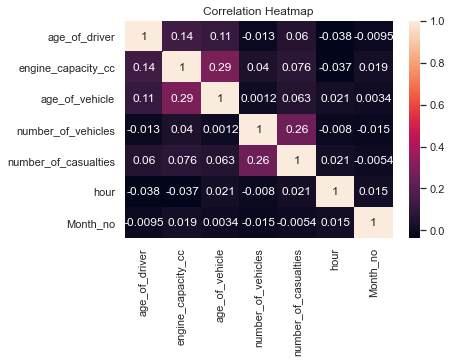

In [192]:
# heat map of correlation between numerical features

corr = sns.heatmap(merged_float.corr(), annot=True)
corr.set_title('Correlation Heatmap')

In [193]:
# categorical variables

merged_cat = merged_clean.select_dtypes(include=['category'])
merged_cat = merged_cat.drop(columns=['speed_limit','vehicle_direction_from','vehicle_direction_to'])
merged_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182344 entries, 717835 to 934215
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   vehicle_type                                 182344 non-null  category
 1   towing_and_articulation                      182344 non-null  category
 2   vehicle_manoeuvre                            182344 non-null  category
 3   vehicle_location_restricted_lane             182344 non-null  category
 4   junction_location                            182344 non-null  category
 5   skidding_and_overturning                     182344 non-null  category
 6   hit_object_in_carriageway                    182344 non-null  category
 7   vehicle_leaving_carriageway                  182344 non-null  category
 8   hit_object_off_carriageway                   182344 non-null  category
 9   first_point_of_impact                      

In [194]:
# https://www.kaggle.com/code/chrisbss1/cramer-s-v-correlation-matrix/notebook

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in merged_cat.columns :
    data_encoded[i]=label.fit_transform(merged_cat[i])

In [195]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [196]:
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

In [197]:
fact = list(df[df['accident_severity']>0].accident_severity.index)
fact

['vehicle_type',
 'vehicle_manoeuvre',
 'junction_location',
 'skidding_and_overturning',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'police_force',
 'accident_severity',
 'local_authority_district',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident']

In [198]:
mat = df[fact]
mat = mat.loc[fact]

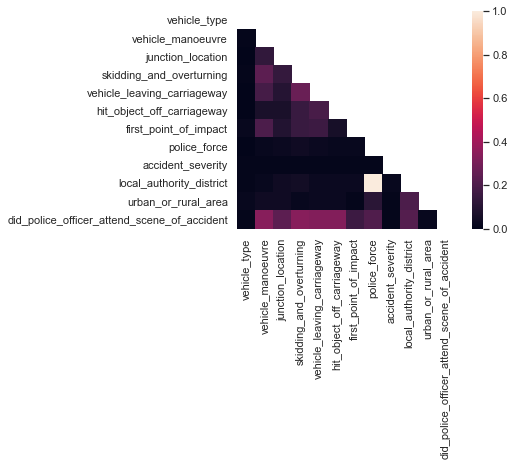

In [199]:
mask = np.zeros_like(mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(mat, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [200]:
lst_var = ['vehicle_type', 'vehicle_leaving_carriageway', 'local_authority_district', 'urban_or_rural_area','age_of_driver', 'age_of_vehicle', 'number_of_vehicles', 'junction_control', 'hour','Month_no','accident_severity']
final = merged_clean[lst_var]

In [205]:
final.to_csv('merged_clean.csv')